In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

# Load data

In [3]:
data_set = pd.read_csv('listings.csv')

In [4]:
data_set.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220924142144,2022-09-24,previous scrape,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,...,4.89,4.73,4.71,NaN,f,1,1,0,0,1.08
1,26057,https://www.airbnb.com/rooms/26057,20220924142144,2022-09-25,city scrape,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,...,4.86,4.94,4.81,NaN,f,1,1,0,0,0.55
2,26473,https://www.airbnb.com/rooms/26473,20220924142144,2022-09-25,city scrape,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,...,4.70,4.89,4.59,NaN,f,3,3,0,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220924142144,2022-09-25,city scrape,Best Location in Cool Istedgade,<b>The space</b><br />The apartment is situate...,NaN,https://a0.muscache.com/pictures/b83c7003-367a...,125230,...,5.00,4.87,4.80,NaN,f,1,1,0,0,0.16
4,31094,https://www.airbnb.com/rooms/31094,20220924142144,2022-09-24,previous scrape,"Beautiful, spacious, central, renovated Penthouse","Welcome to our home, we hope you will enjoy Wo...","What else is nearby?<br />To be honest, We thi...",https://a0.muscache.com/pictures/miso/Hosting-...,129976,...,4.82,4.80,4.53,NaN,f,1,1,0,0,0.13


# 1 - Filtering columns

In [5]:
columns_to_keep = [
        'id',
    'name',
    'host_id',
    'host_name',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

data = pd.DataFrame()
for column in columns_to_keep:
    data[column] = data_set[column]

data.head()

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,$898.00,3,...,4.78,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,"$2,600.00",4,...,4.91,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,"$3,250.00",3,...,4.53,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,$725.00,7,...,4.92,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,"$1,954.00",3,...,4.88,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0


# 2 - Handling missing values

In [6]:
data = data[data["number_of_reviews"] > 0]
data['number_of_reviews'].value_counts(ascending=True)

249       1
164       1
127       1
432       1
289       1
       ... 
5       640
4       749
3       920
2      1008
1      1067
Name: number_of_reviews, Length: 265, dtype: int64

# 3 - Fixing neighbourhood_cleansed and price

In [7]:
data['neighbourhood_cleansed'].value_counts()

Nrrebro                      2061
Vesterbro-Kongens Enghave    2037
Indre By                     1851
sterbro                      1311
Frederiksberg                1183
Amager Vest                  1066
Amager st                     928
Bispebjerg                    607
Valby                         539
Vanlse                        298
Brnshj-Husum                  289
Name: neighbourhood_cleansed, dtype: int64

In [8]:
data.loc[data['neighbourhood_cleansed'] == 'Nrrebro', 'neighbourhood_cleansed'] = 'Nørrebro'
data.loc[data['neighbourhood_cleansed'] == 'vsterbro', 'neighbourhood_cleansed'] = 'Østerbro'
data.loc[data['neighbourhood_cleansed'] == 'Vanlse', 'neighbourhood_cleansed'] = 'Vanløse'
data.loc[data['neighbourhood_cleansed'] == 'Amager st', 'neighbourhood_cleansed'] = 'Amager Øst'
data.loc[data['neighbourhood_cleansed'] == 'Brnshj-Husum', 'neighbourhood_cleansed'] = 'Brønshøj-Husum'
data['neighbourhood_cleansed'].value_counts()

Nørrebro                     2061
Vesterbro-Kongens Enghave    2037
Indre By                     1851
sterbro                      1311
Frederiksberg                1183
Amager Vest                  1066
Amager Øst                    928
Bispebjerg                    607
Valby                         539
Vanløse                       298
Brønshøj-Husum                289
Name: neighbourhood_cleansed, dtype: int64

In [9]:
data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)
data['price']

C:\Users\Bruger\AppData\Local\Temp\ipykernel_20484\1560686785.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace(',', '').str.replace('$', '').astype(float)


0         898.0
1        2600.0
2        3250.0
3         725.0
4        1954.0
          ...  
13808     856.0
13809    1050.0
13811     450.0
13812     400.0
13814     420.0
Name: price, Length: 12170, dtype: float64

# 4 - Words cloud of names 

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(name for name in data['name'])
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Copenhagen', 'copenhagen', 'København', 'københavn', 'cph', 'CPH', 'kbh', 'KBH'])
wordcloud = WordCloud(stopwords=custom_stopwords, background_color="white", width=800, height=400).generate(text)


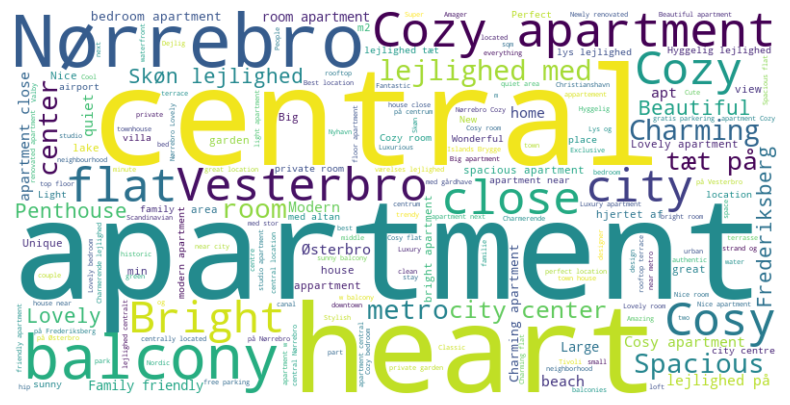

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 5 - Word cloud of host names

In [12]:
host_names_text = " ".join(str(name) for name in data['host_name'])
wordcloud_host_names = WordCloud(background_color="white", width=800, height=400).generate(host_names_text)

The distribution of host names seem to correspond with the distribution of names according to Danmarks Statistik, where `Mette` and `Anne` are the most popular names and most of the other names are top 20 in their category

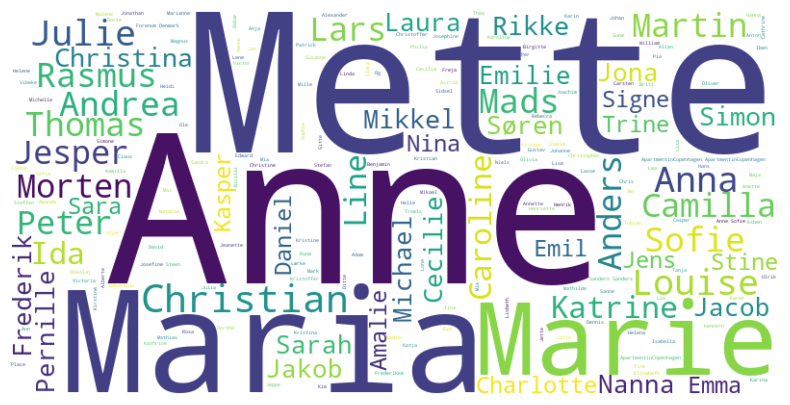

In [13]:
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud_host_names, interpolation='bilinear')
plt.axis('off')
plt.show()

# 6 - Creating column of price bins

In [14]:
price_bins = np.linspace(0,10000, num=11)
price_bins

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000.])

In [15]:
data['price_category'] = data['price'].apply(lambda price: np.digitize(price, price_bins))
data[['price', 'price_category']].head()

,price,price_category
0,898.0,1
1,2600.0,3
2,3250.0,4
3,725.0,1
4,1954.0,2


# 7 Plotting listings data on map

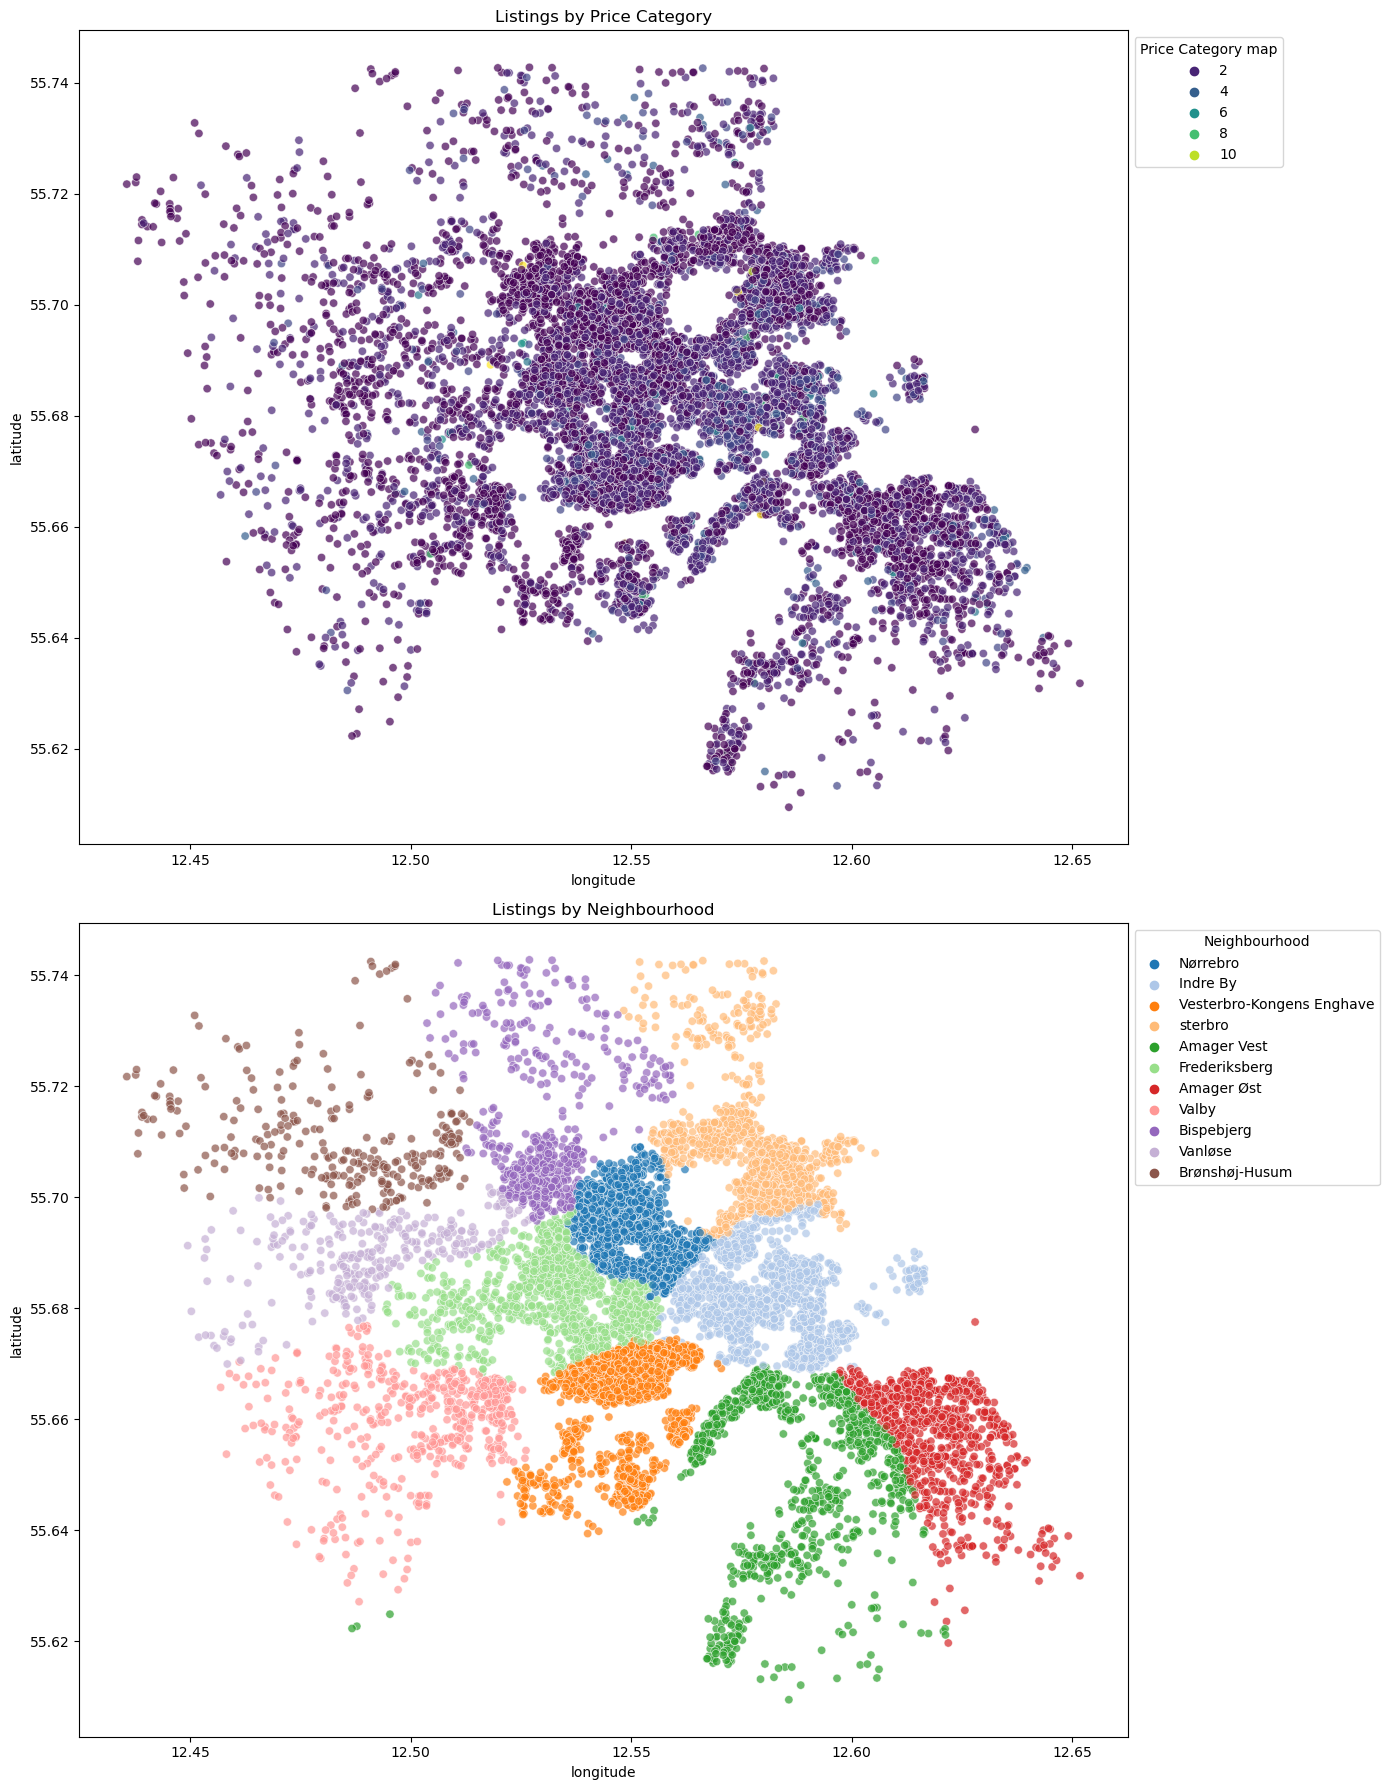

In [16]:
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize=(14, 18))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='price_category', palette='viridis', ax=ax[0], alpha=0.7)
ax[0].set_title("Listings by Price Category")
ax[0].legend(loc="upper left", title="Price Category map", bbox_to_anchor=(1, 1))

sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_cleansed', palette='tab20', ax=ax[1], alpha=0.7)
ax[1].set_title("Listings by Neighbourhood")
ax[1].legend(loc="upper left", title="Neighbourhood", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# 8 - Boxplots 

## Prices by neighbourhood

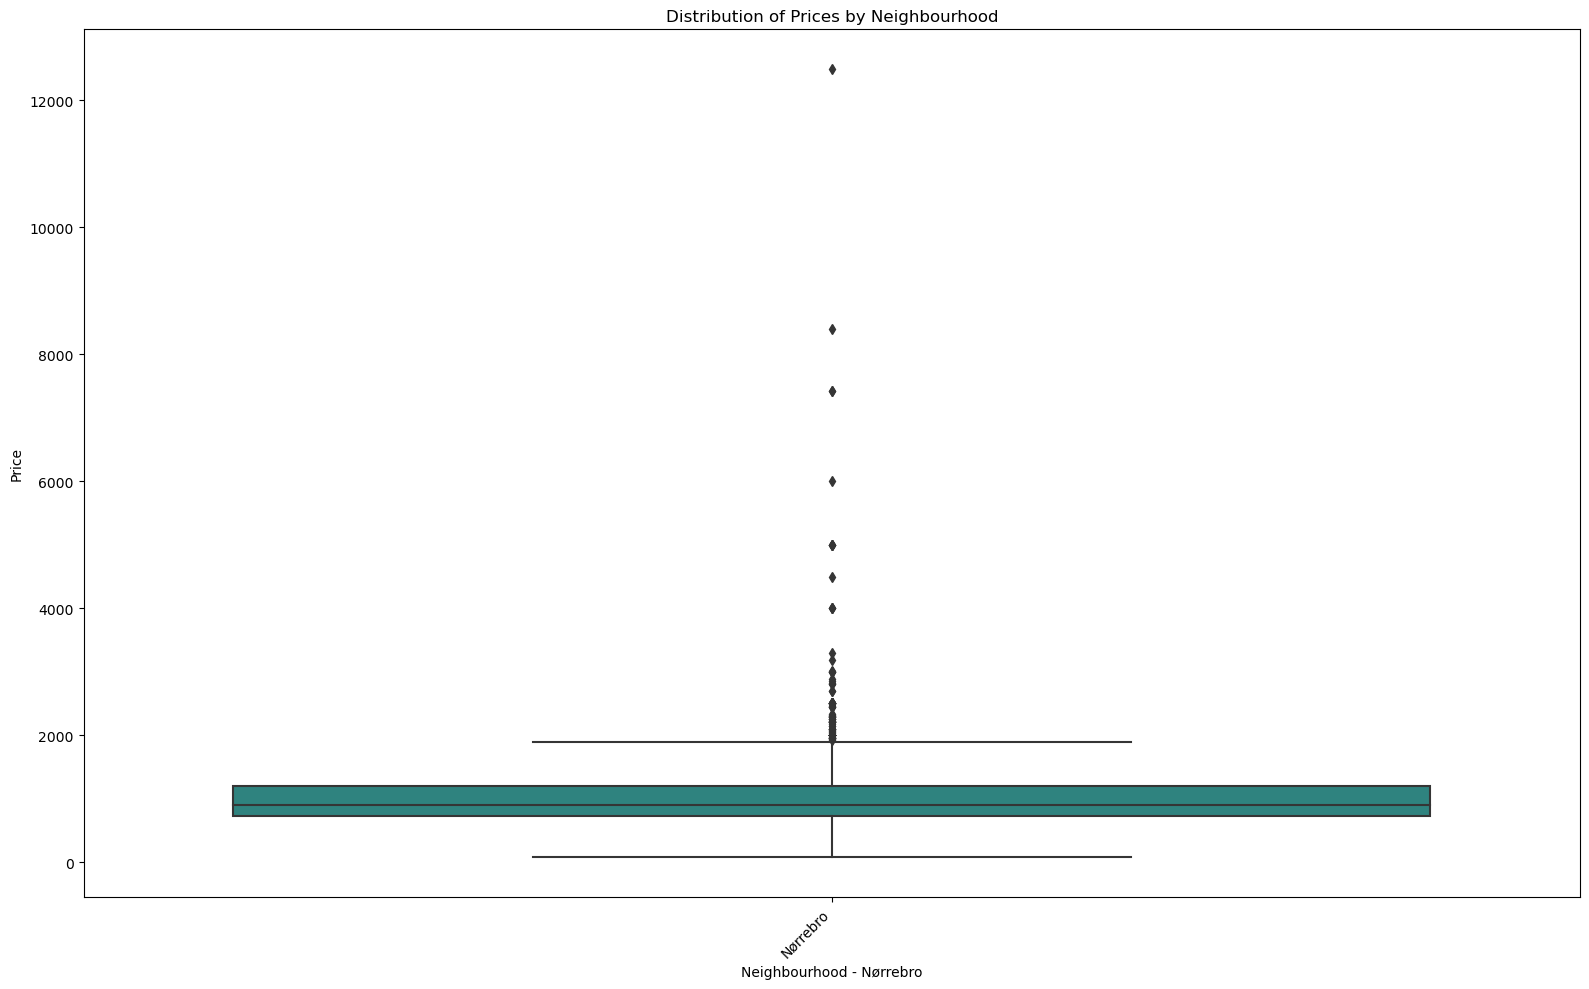

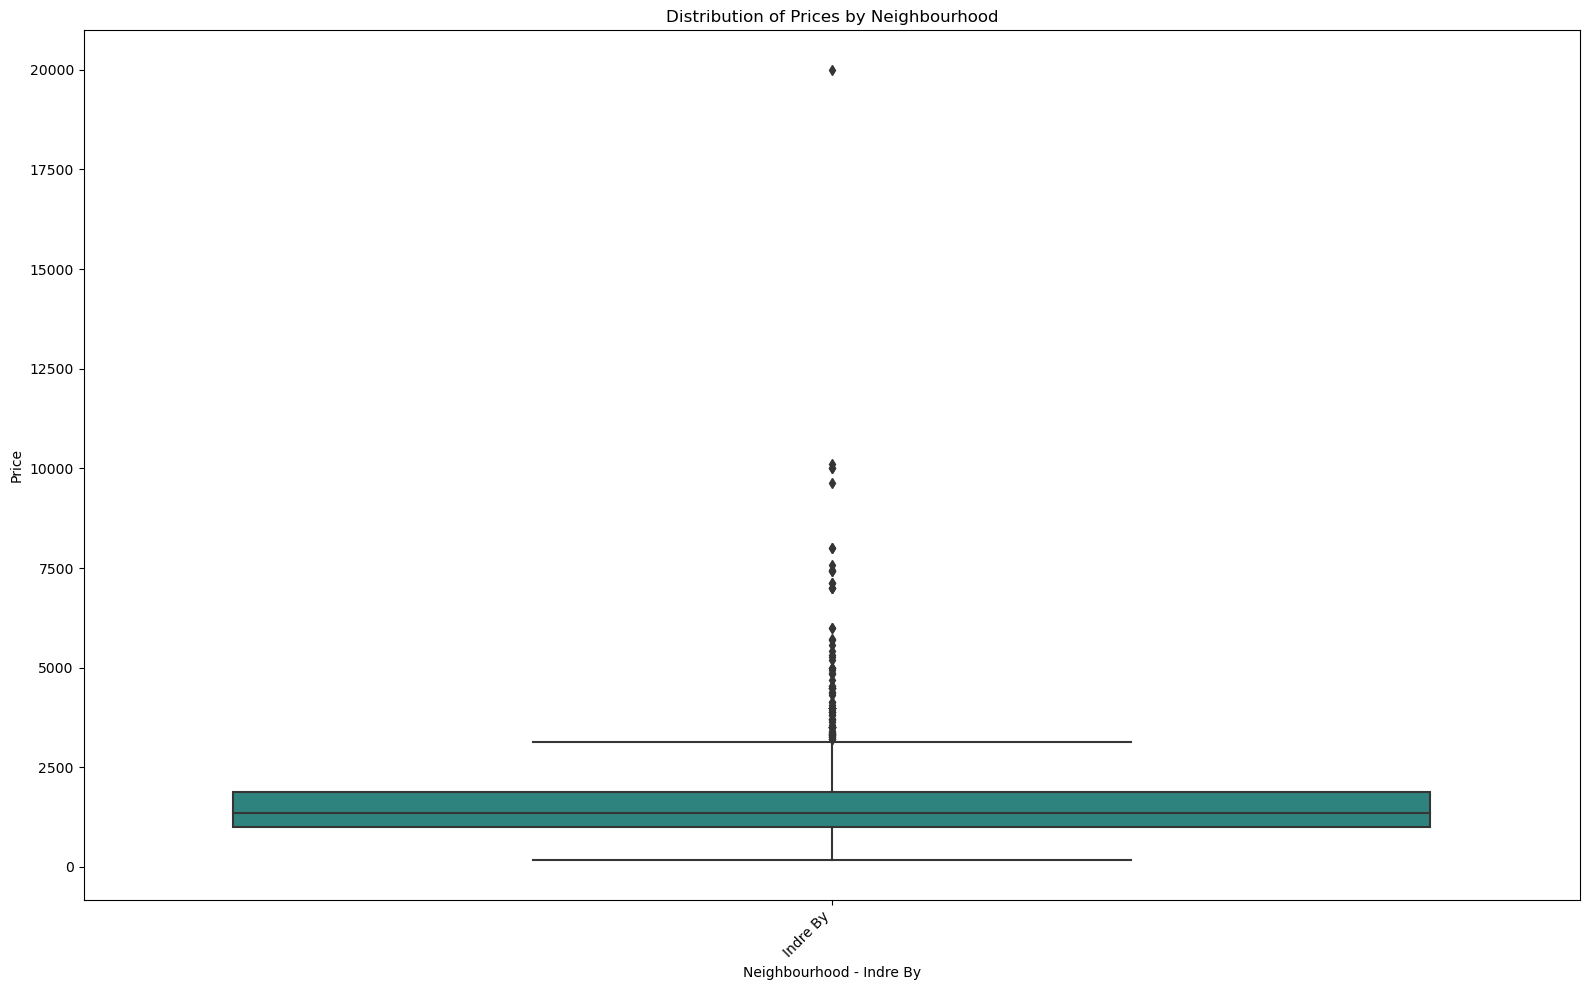

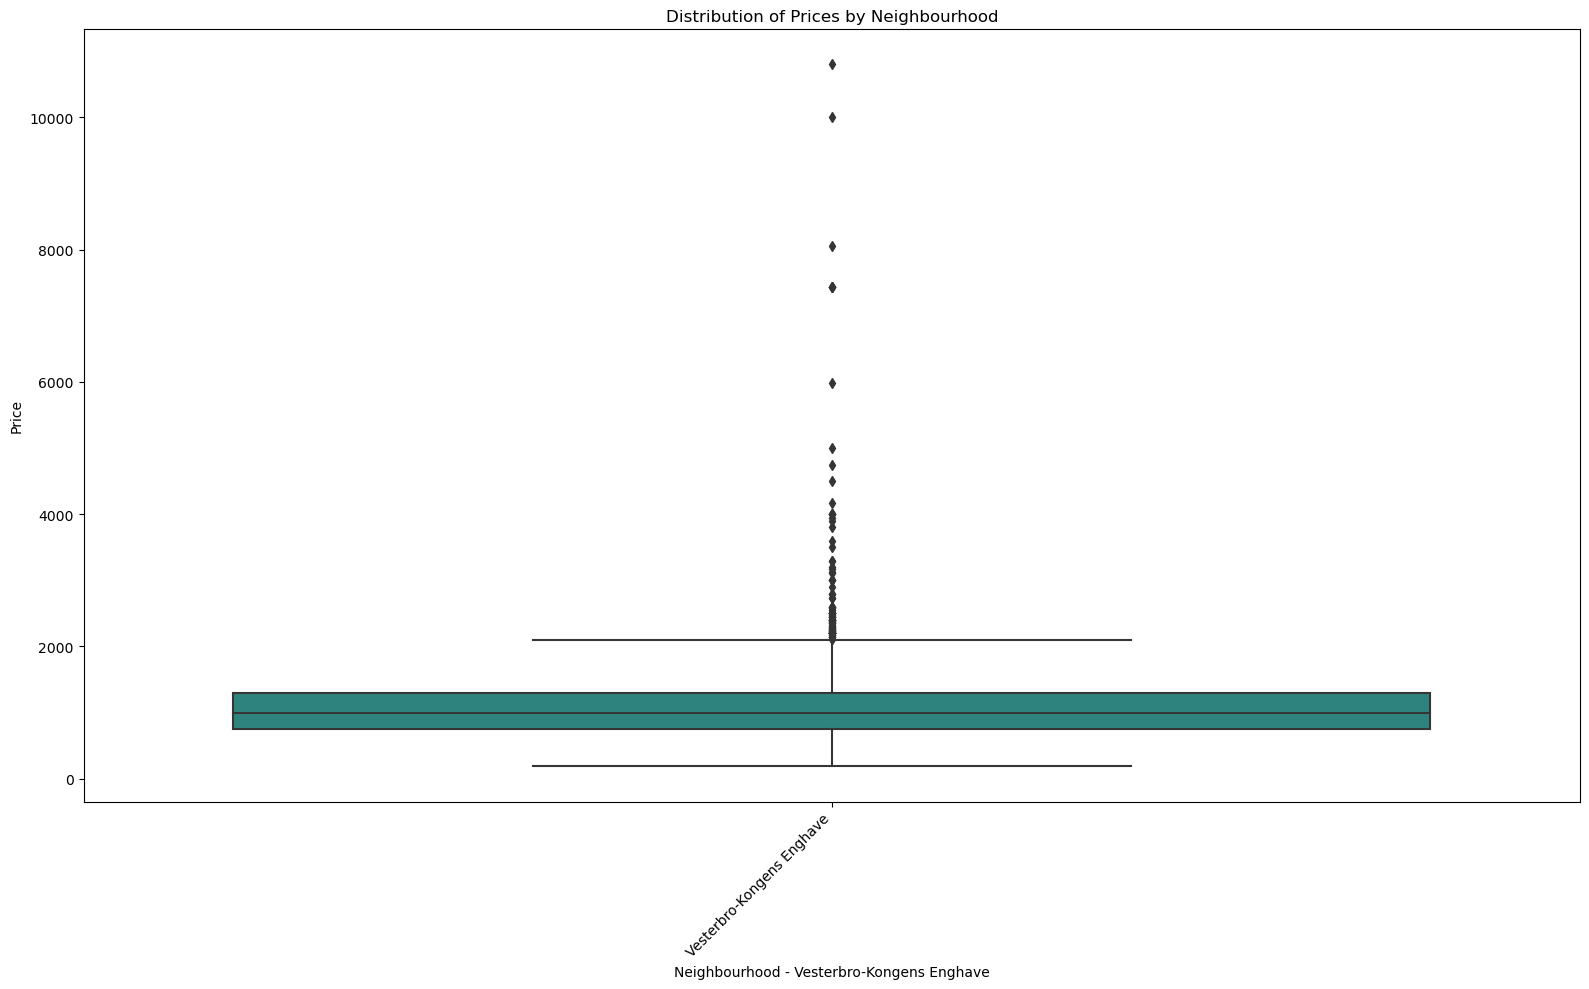

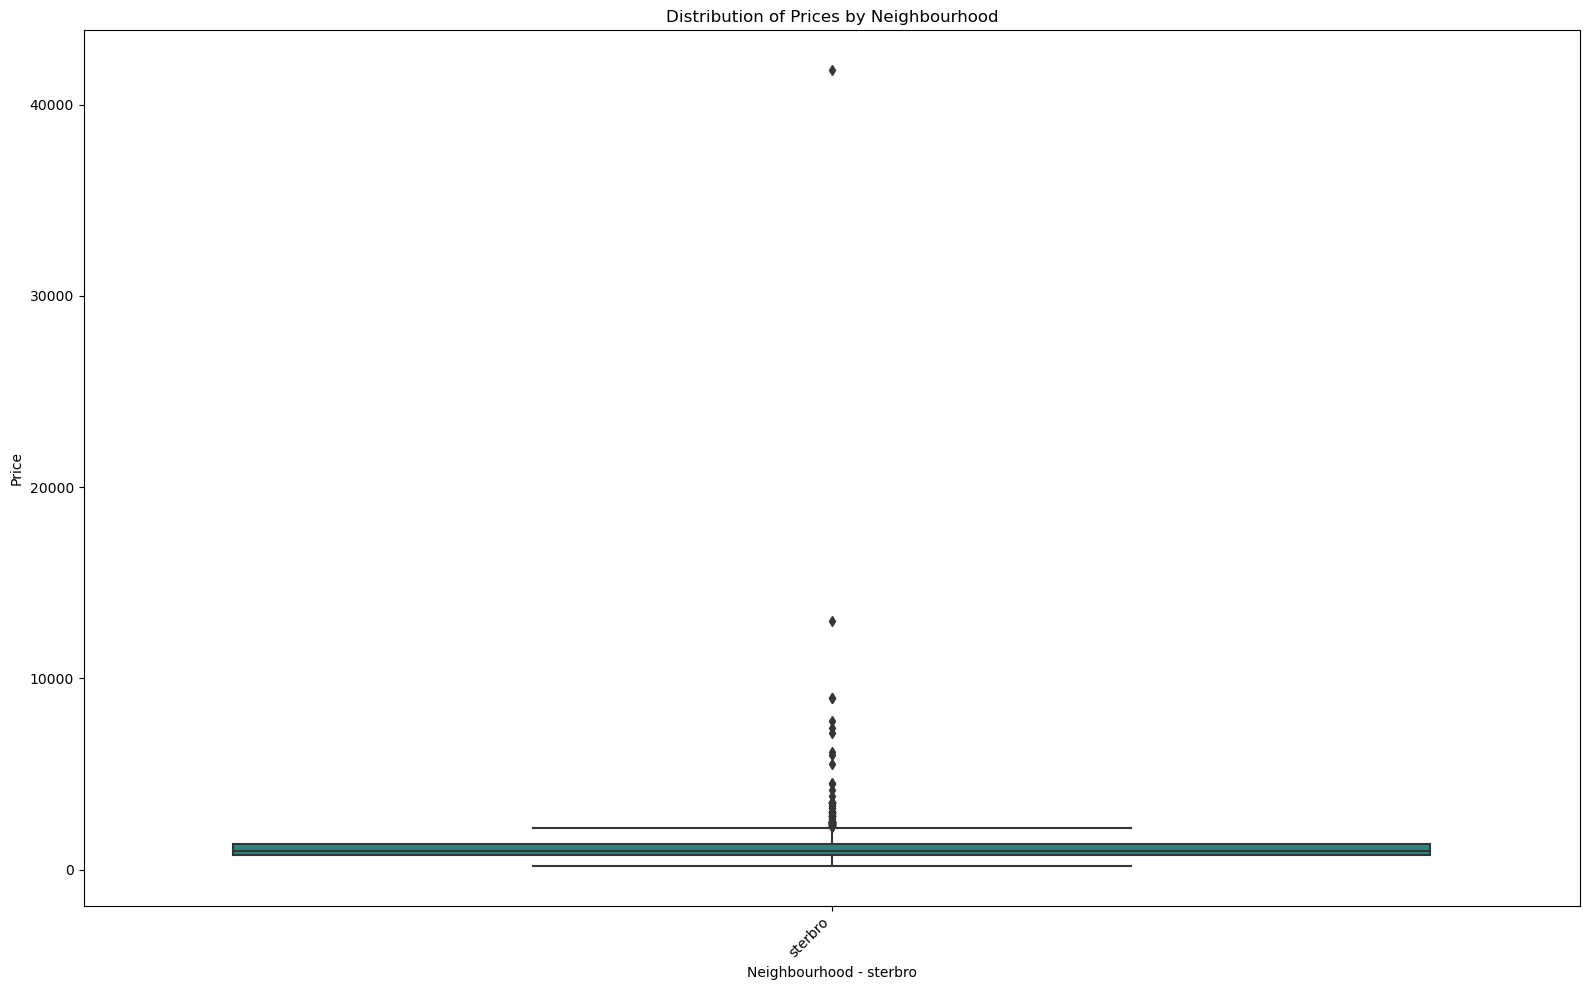

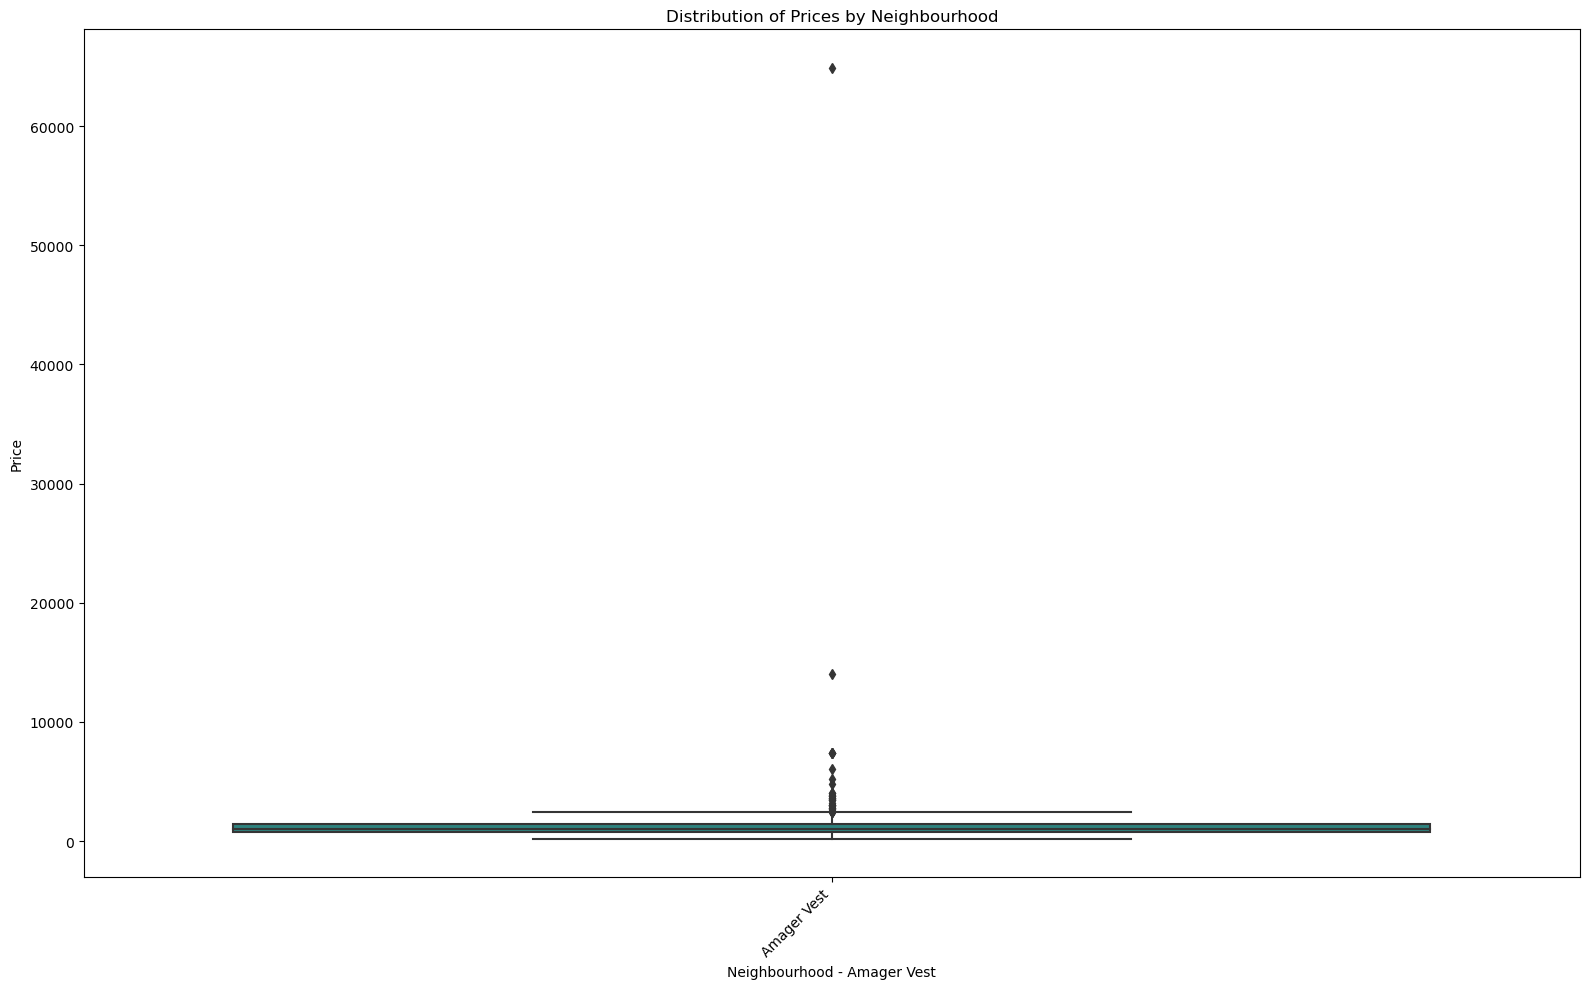

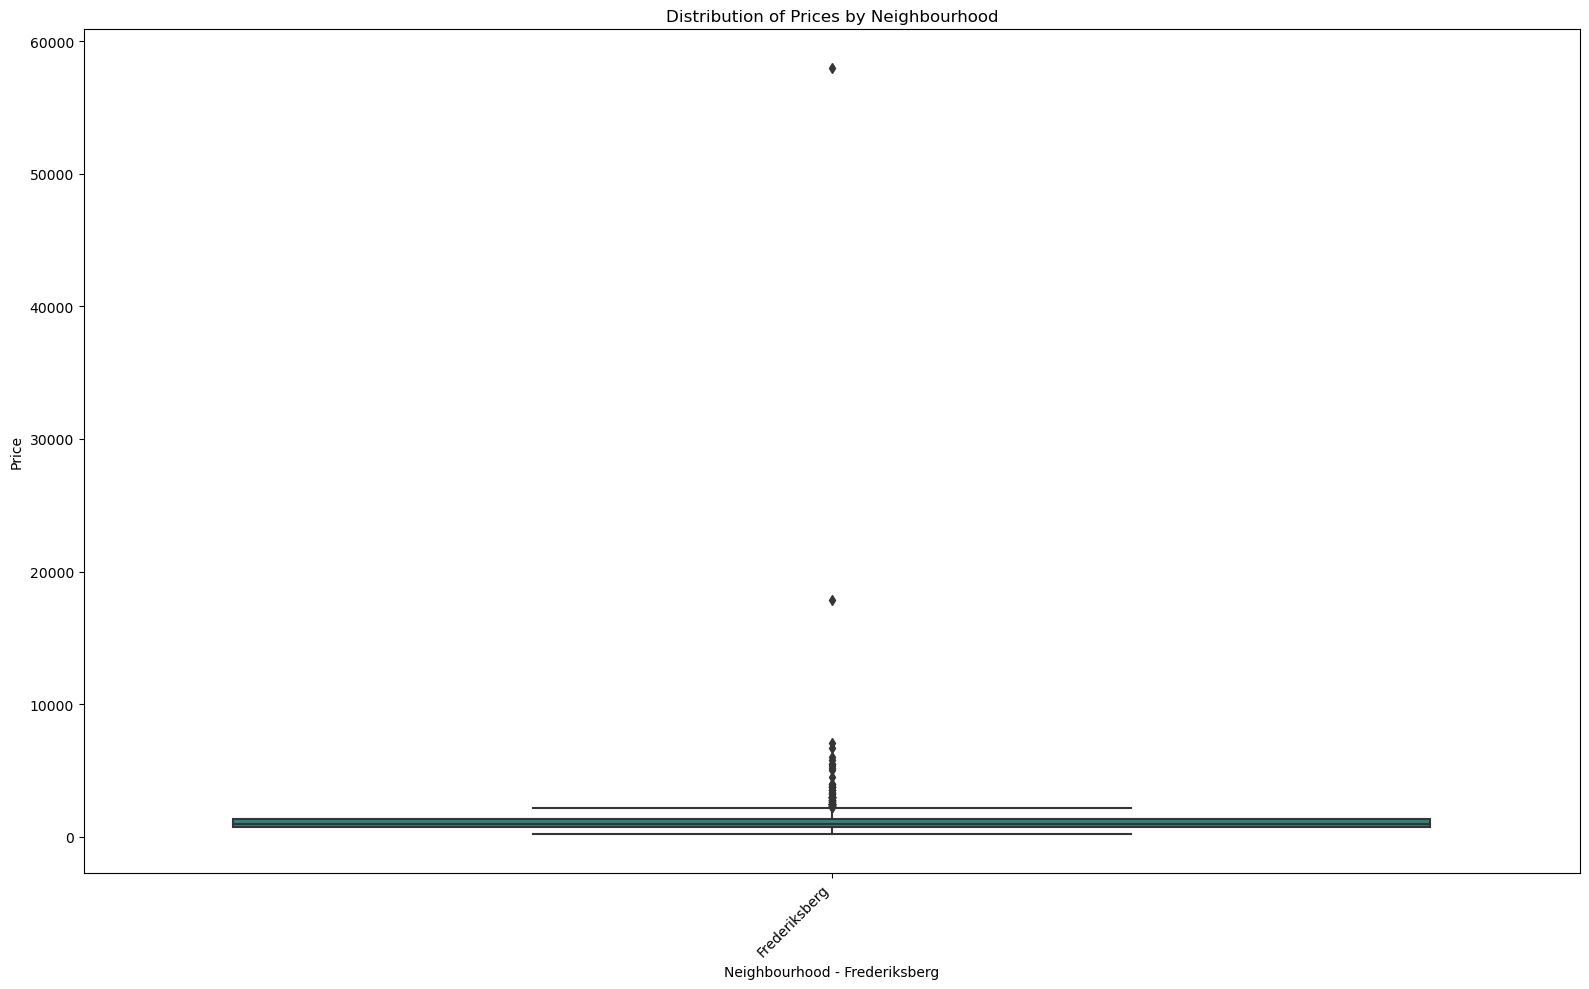

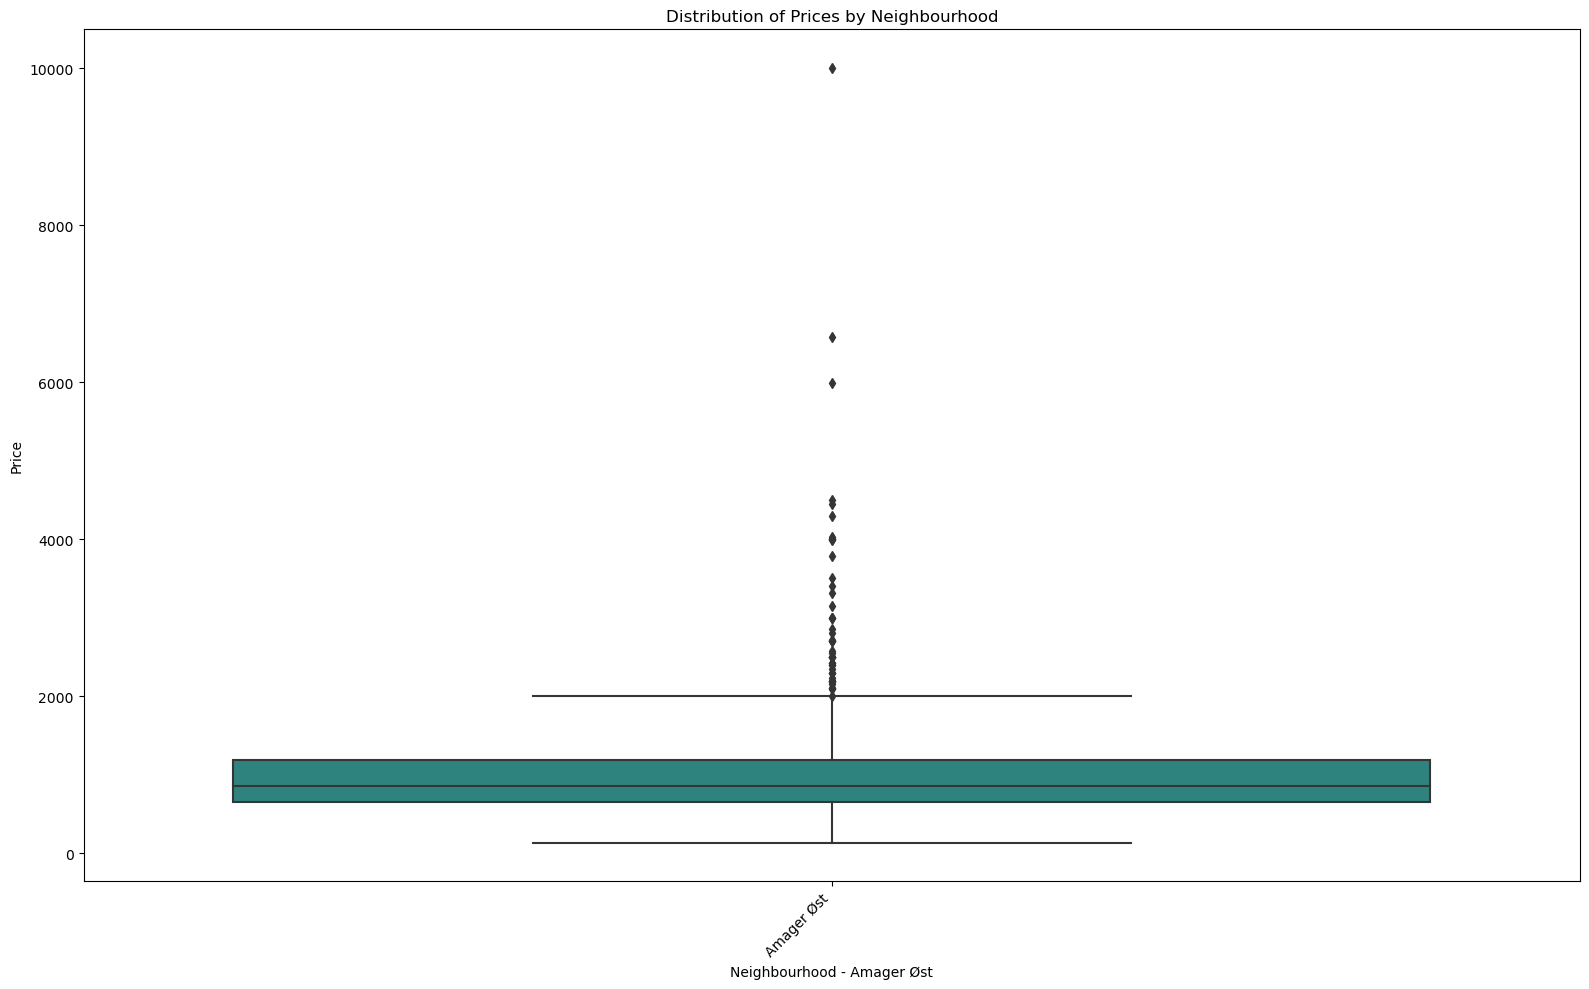

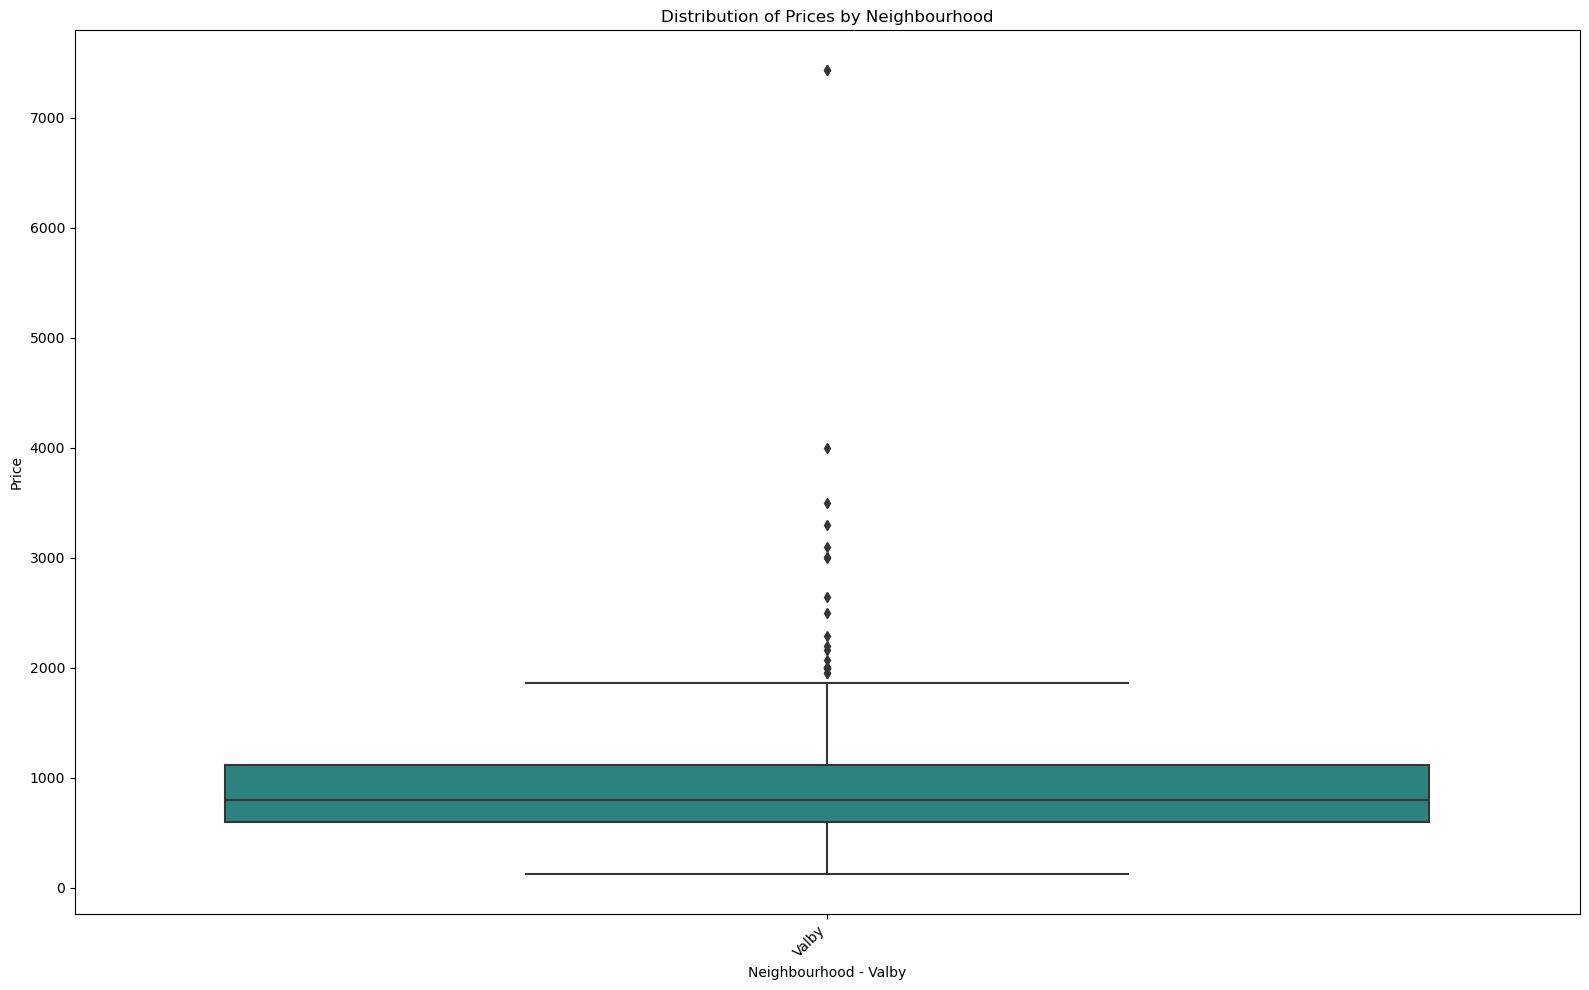

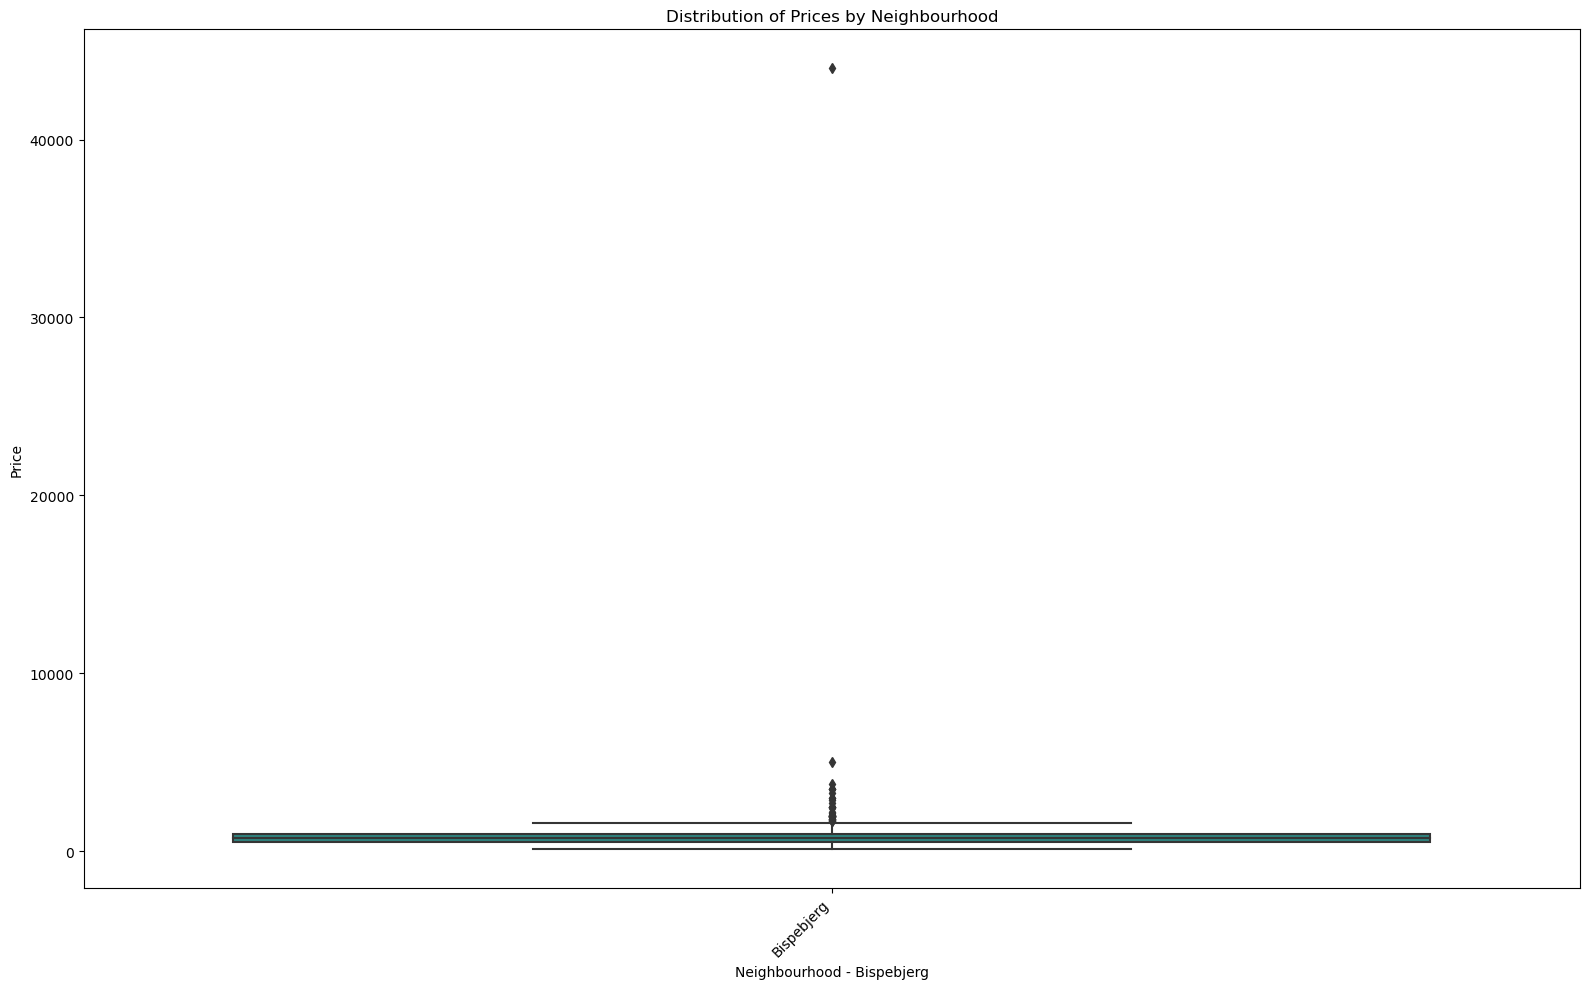

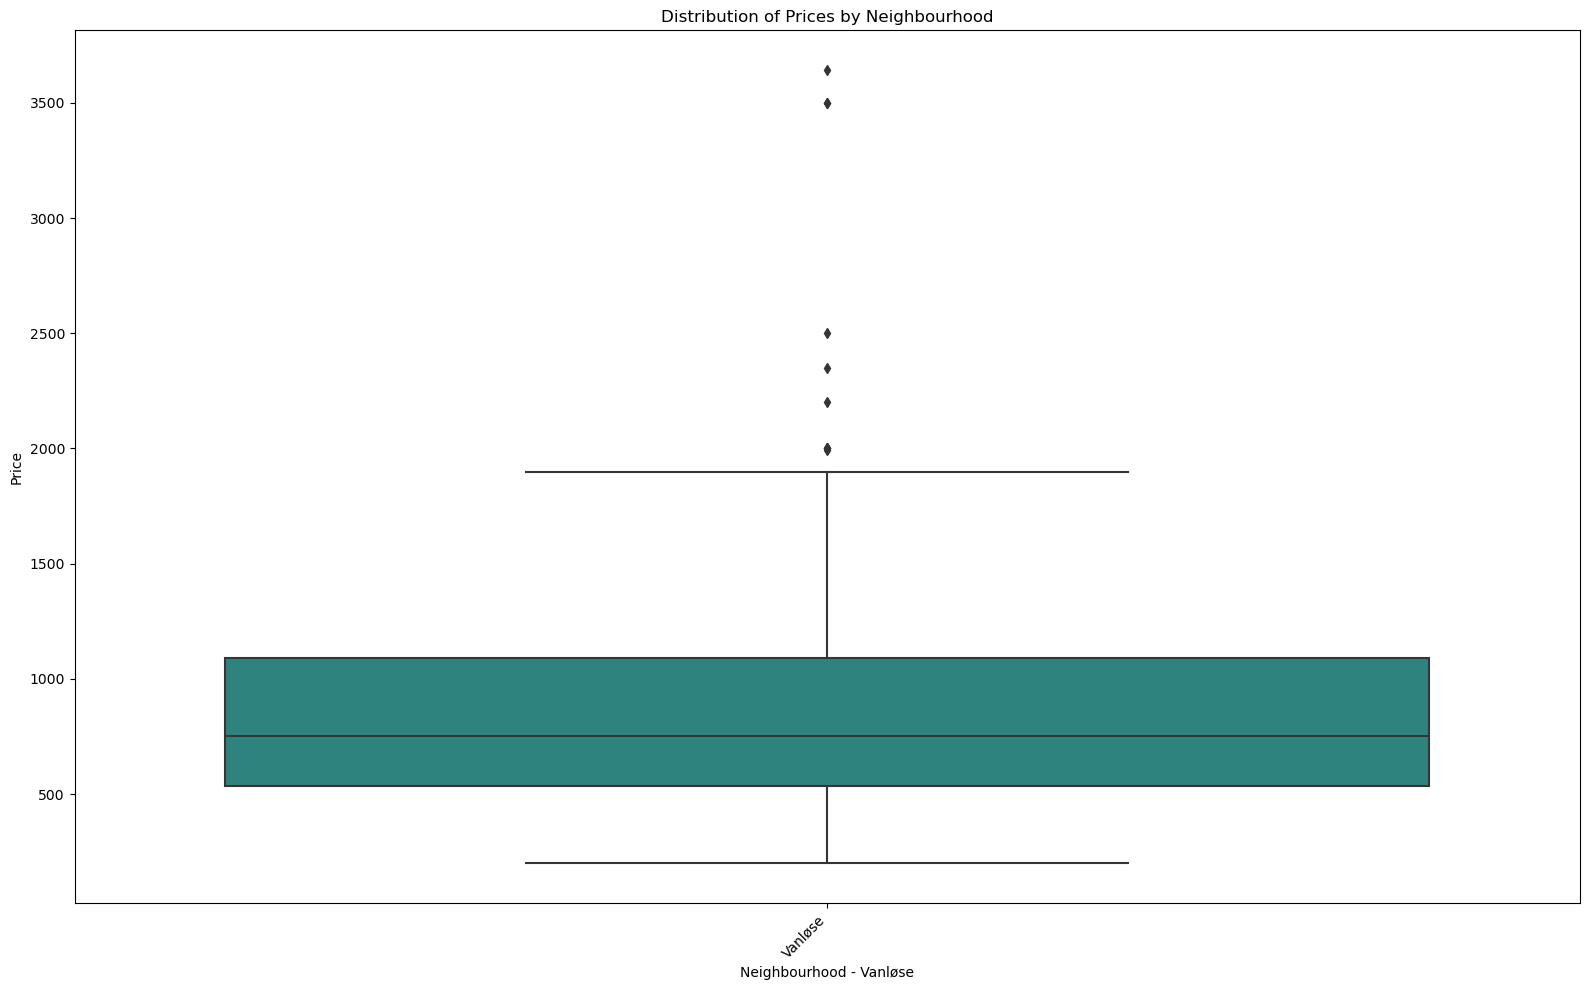

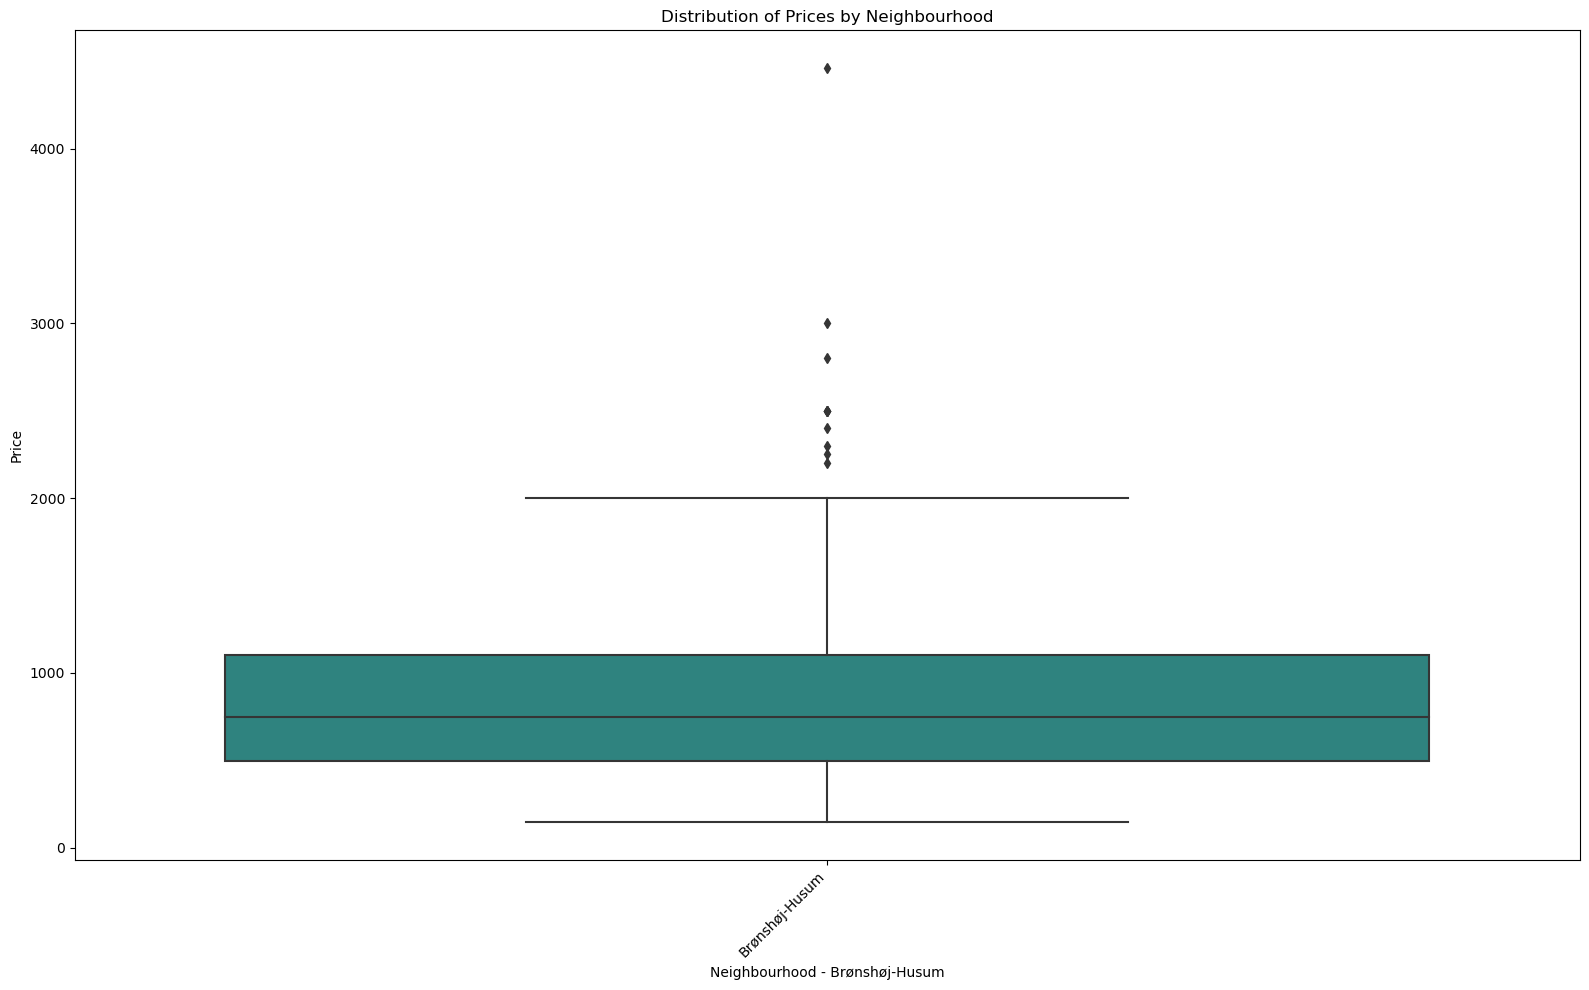

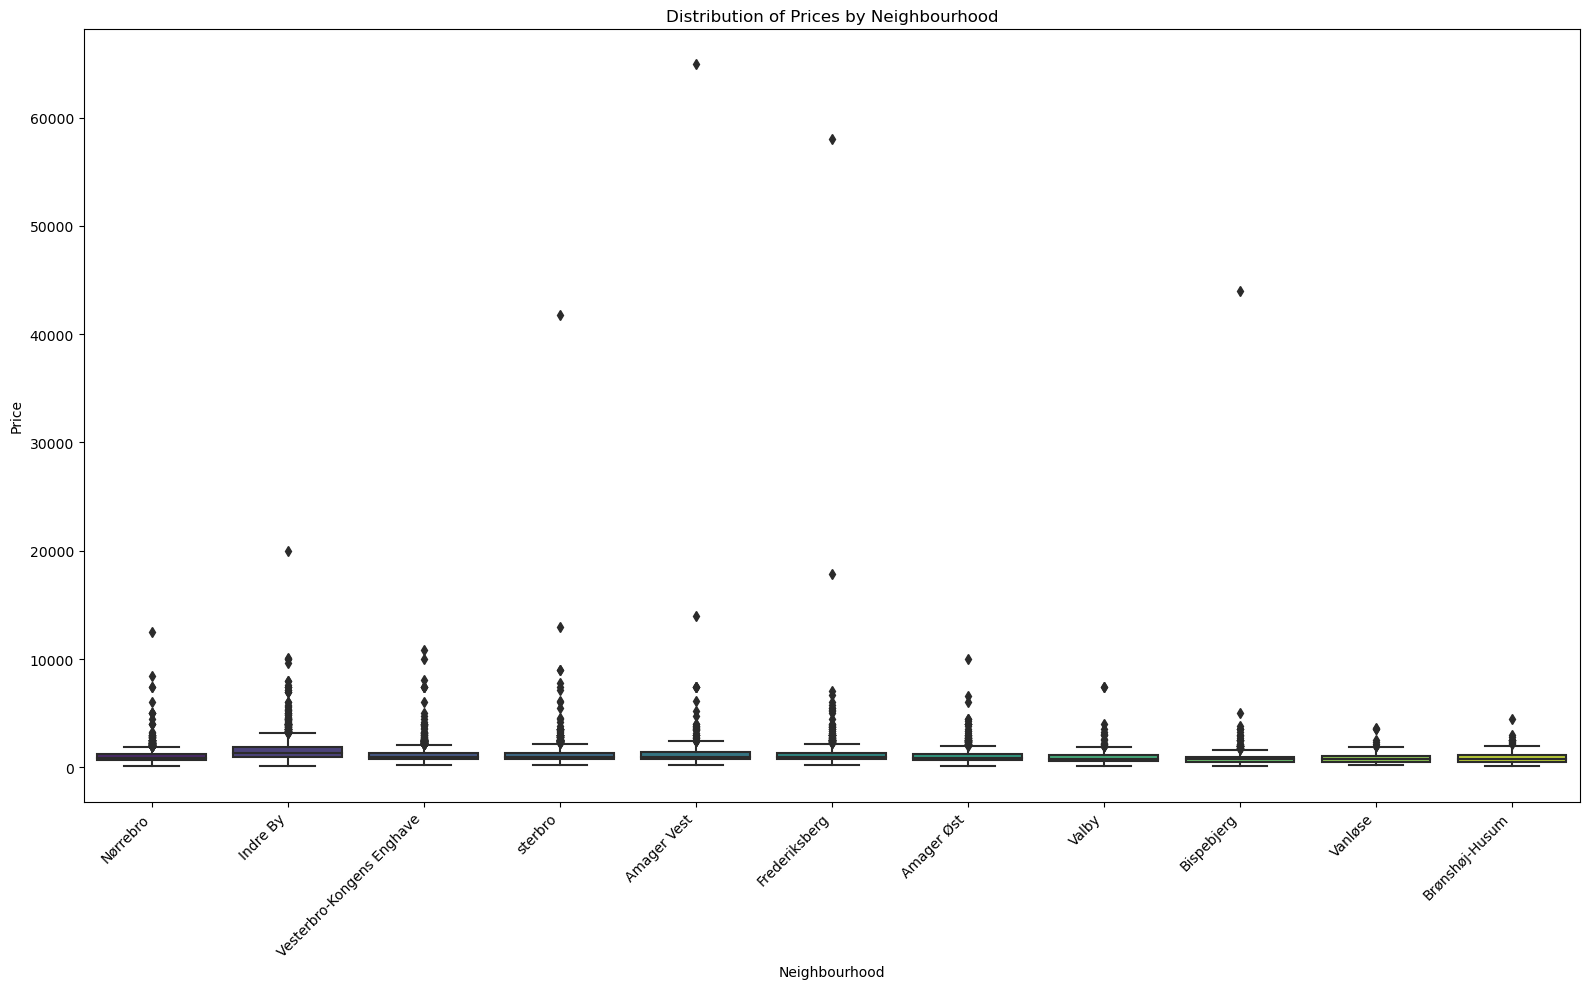

In [17]:
for neighbourhood in data['neighbourhood_cleansed'].unique():
    plt.figure(figsize=(16, 10))
    sns.boxplot(data=data[data['neighbourhood_cleansed'] == neighbourhood], x='neighbourhood_cleansed', y='price', palette='viridis')
    plt.title("Distribution of Prices by Neighbourhood")
    plt.ylabel("Price")
    plt.xlabel(f"Neighbourhood - {neighbourhood}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



plt.figure(figsize=(16, 10))
sns.boxplot(data=data, x='neighbourhood_cleansed', y='price', palette='viridis')
plt.title("Distribution of Prices by Neighbourhood")
plt.ylabel("Price")
plt.xlabel("Neighbourhood")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- The pricing of the listings are right/positive skewed in most neighbourhoods.
- The median prices accross neighbourhoods varies
- The spread is broader in some neighbourhoods than others
- 

## Review score ratings by neighbourhood

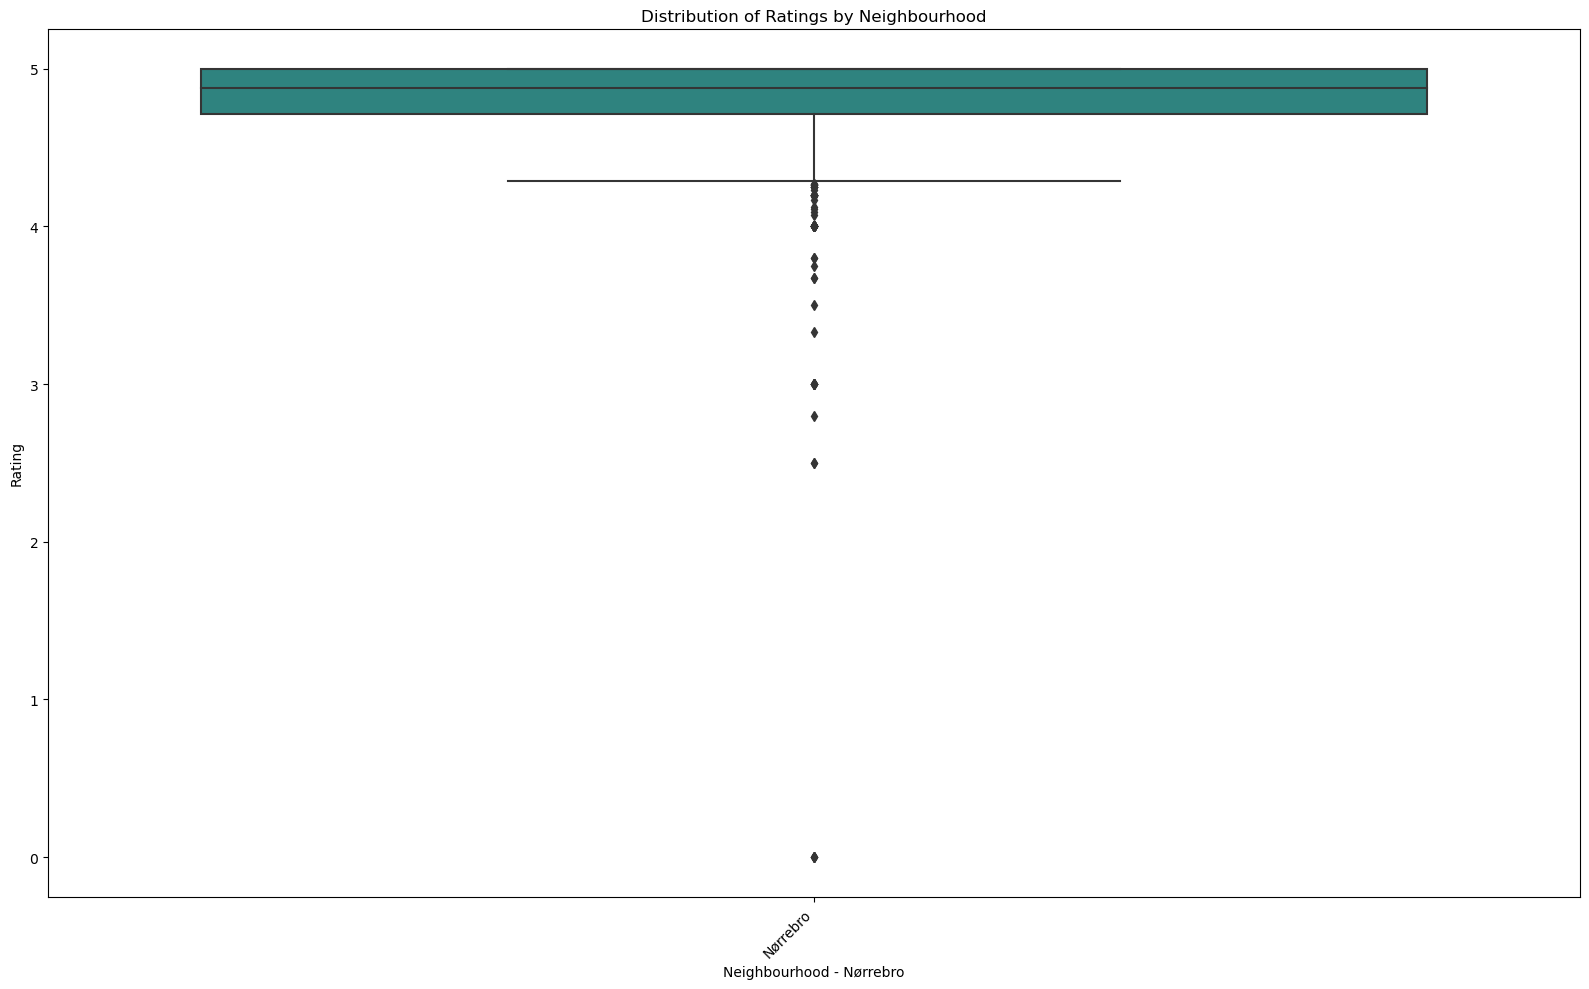

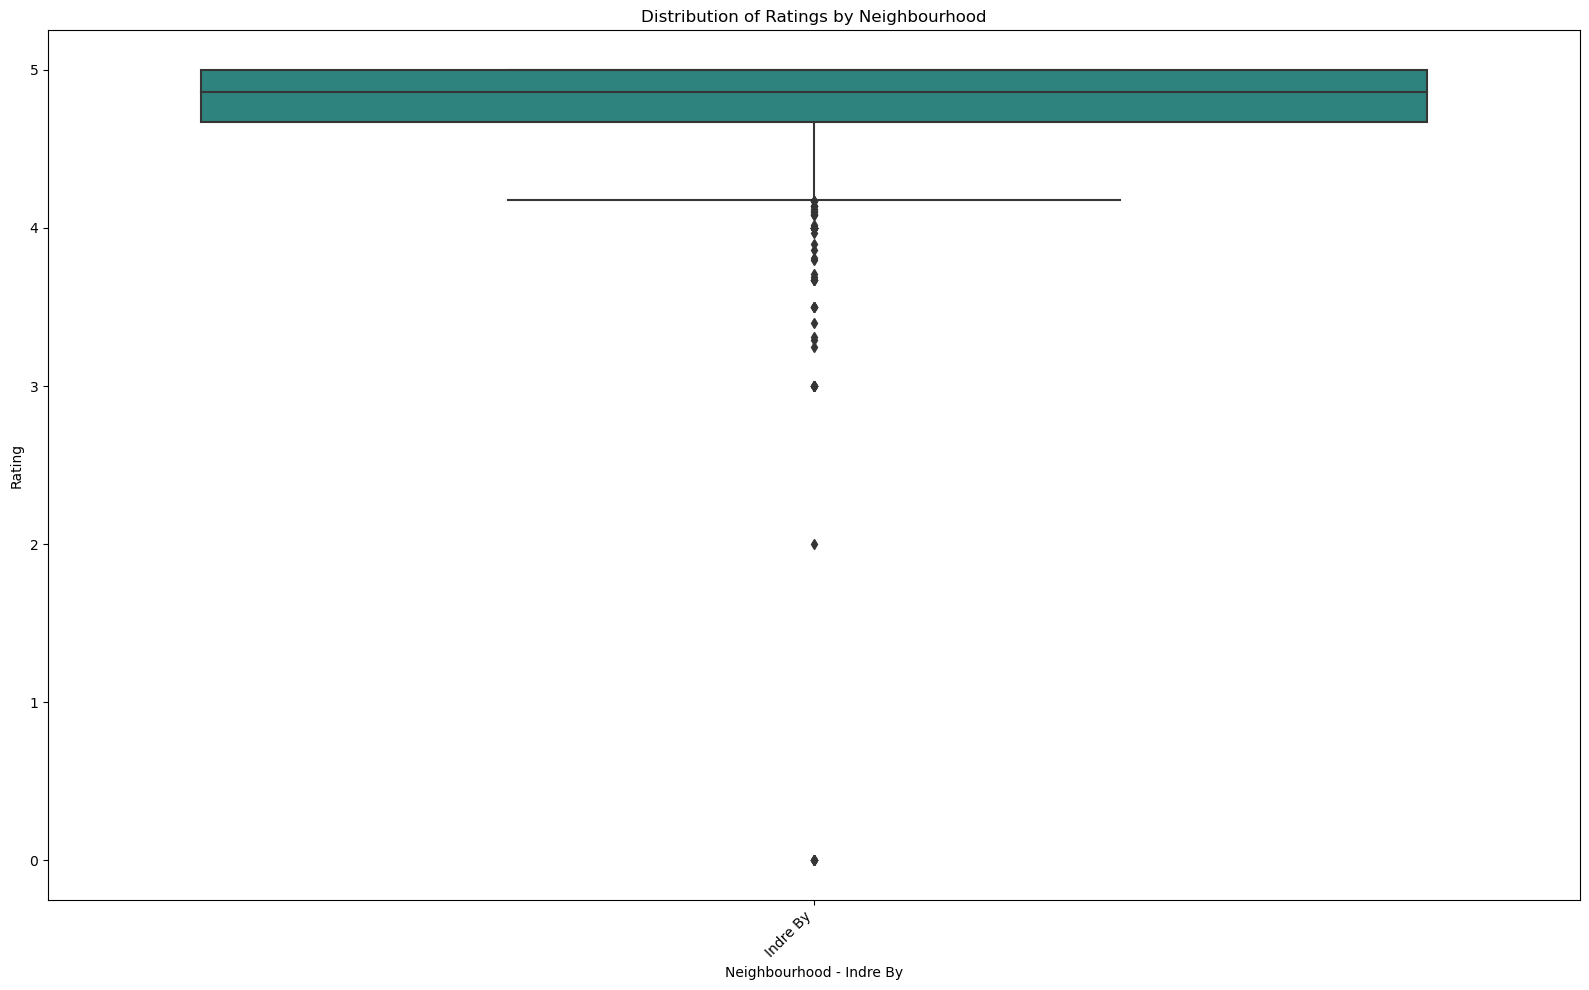

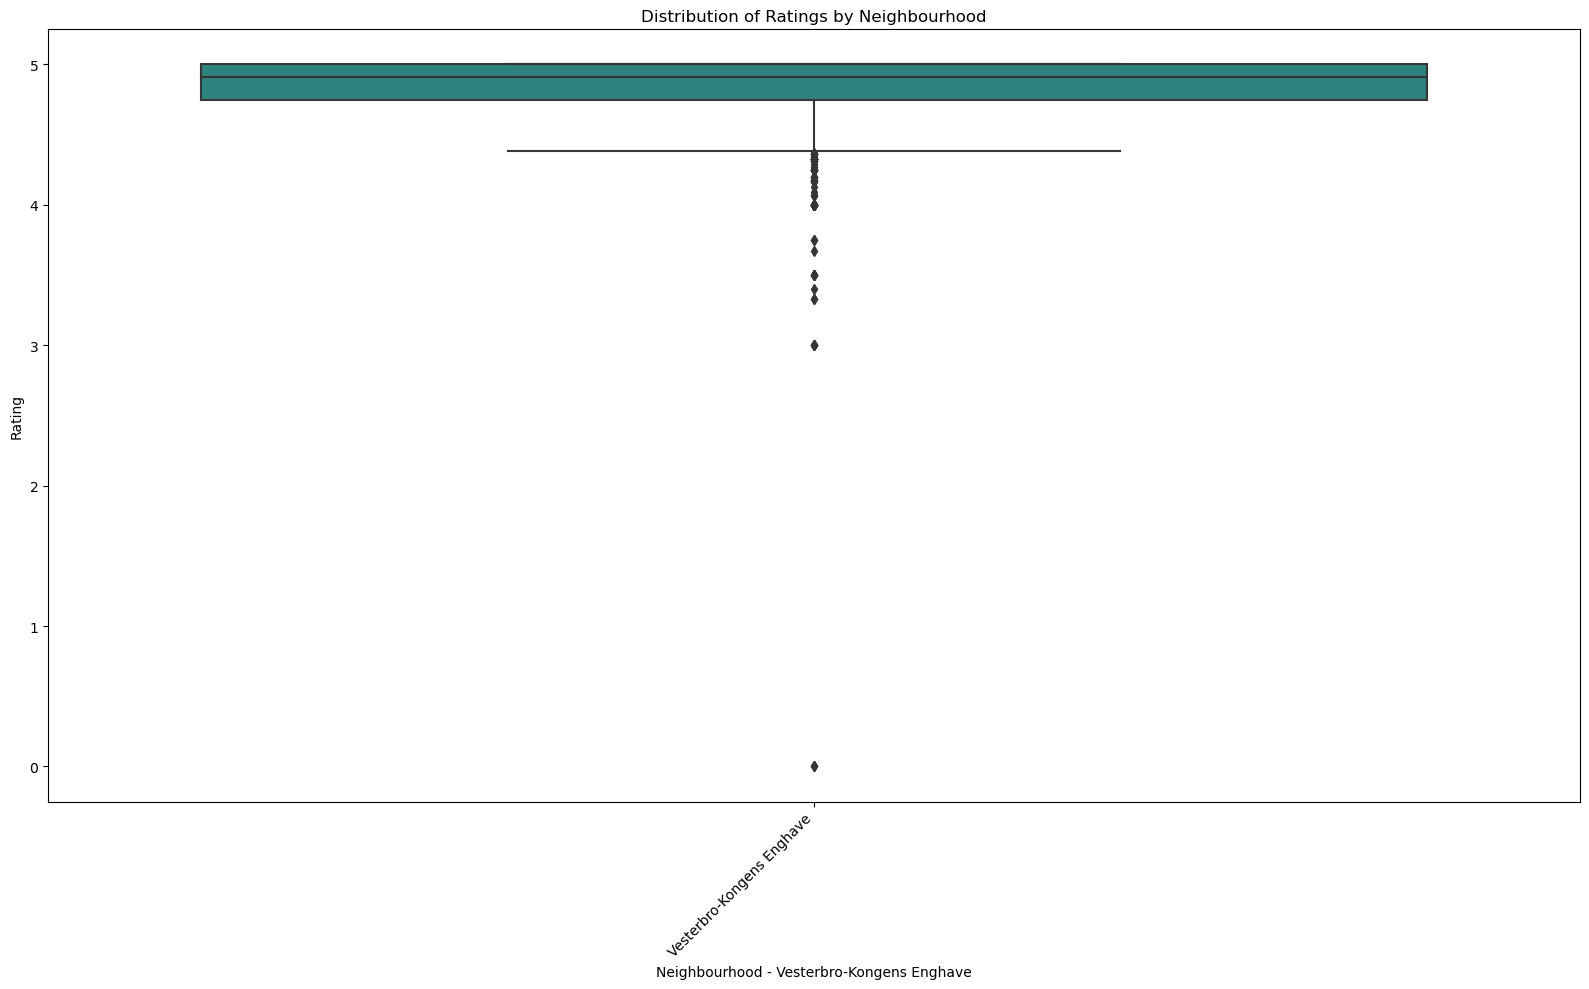

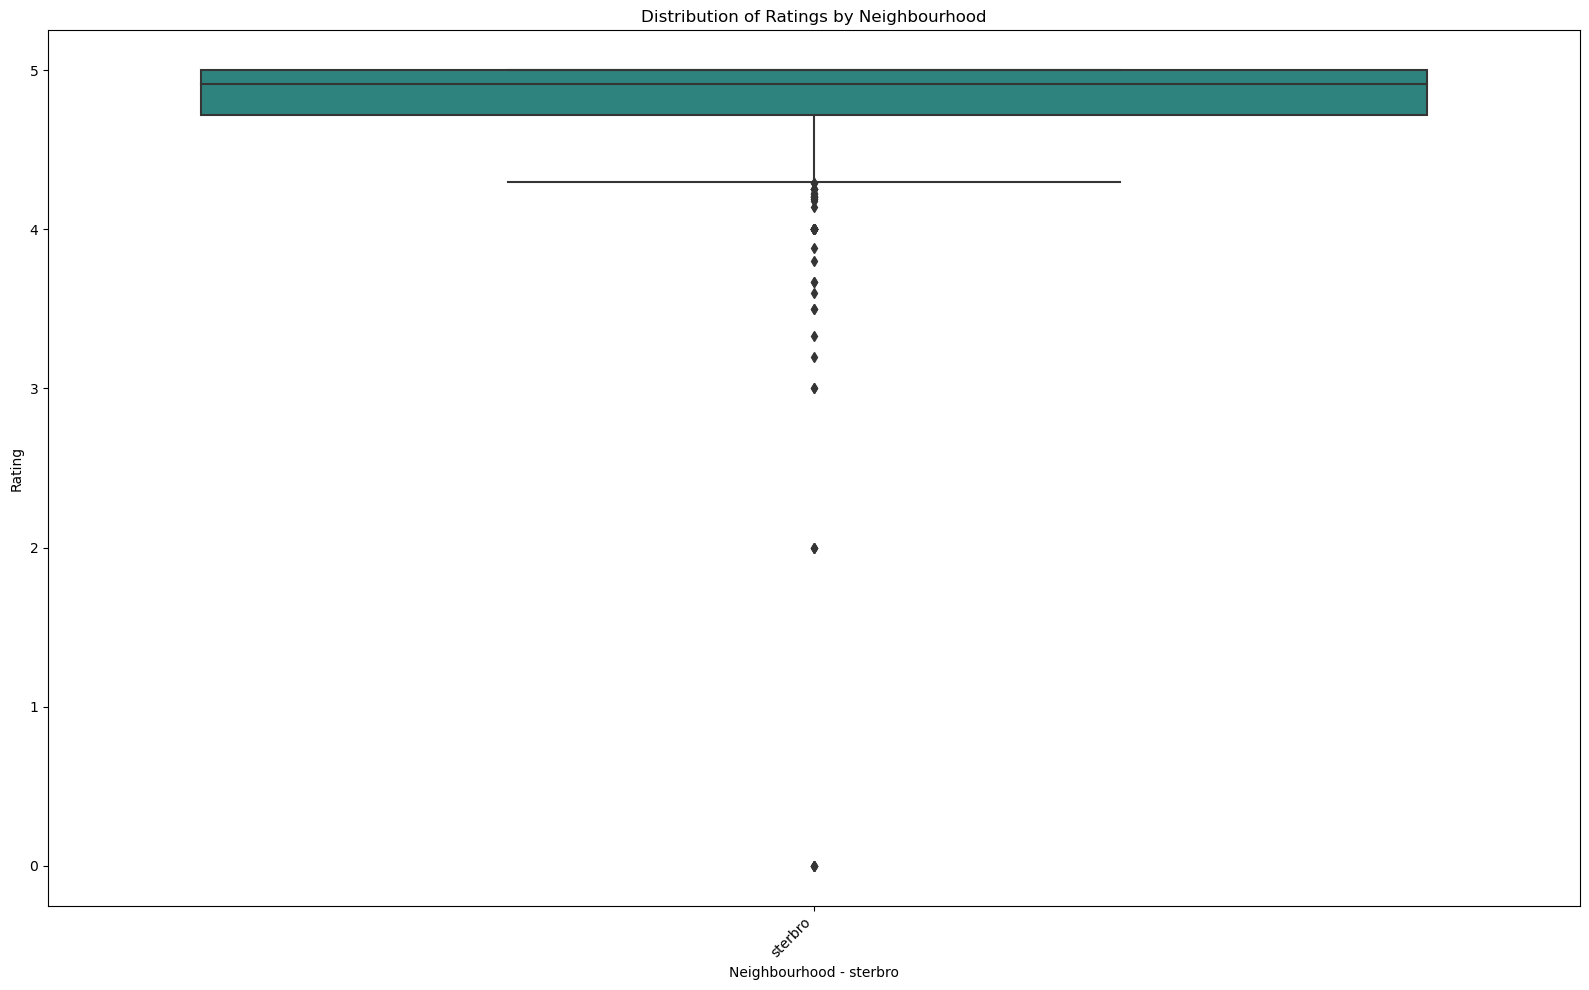

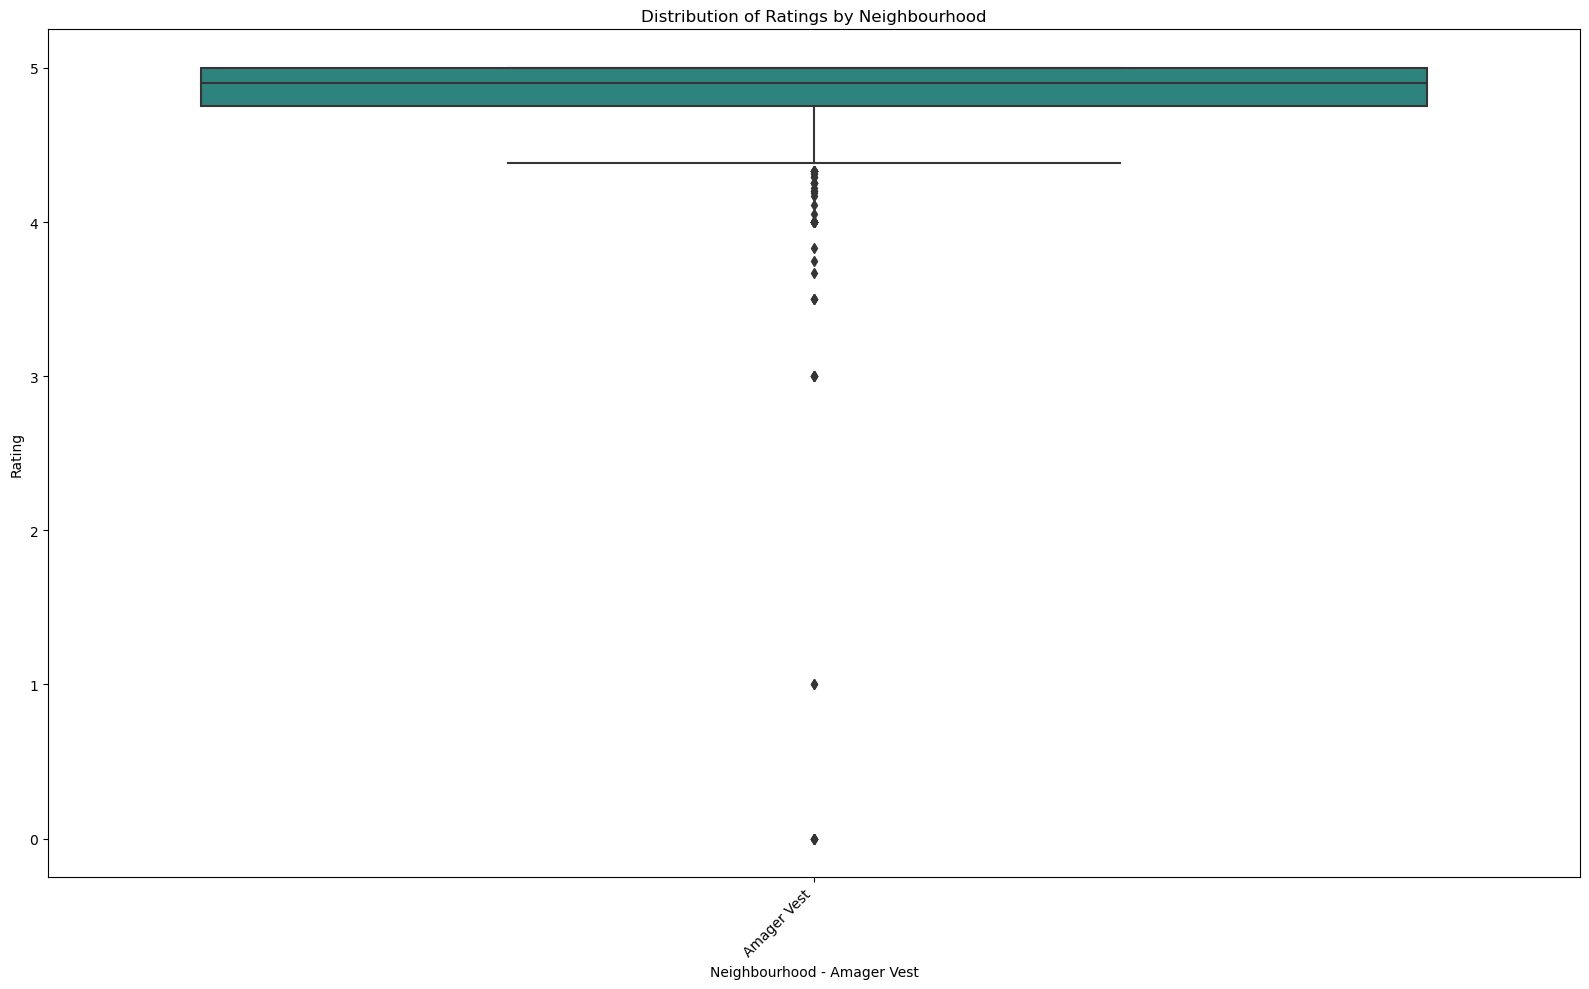

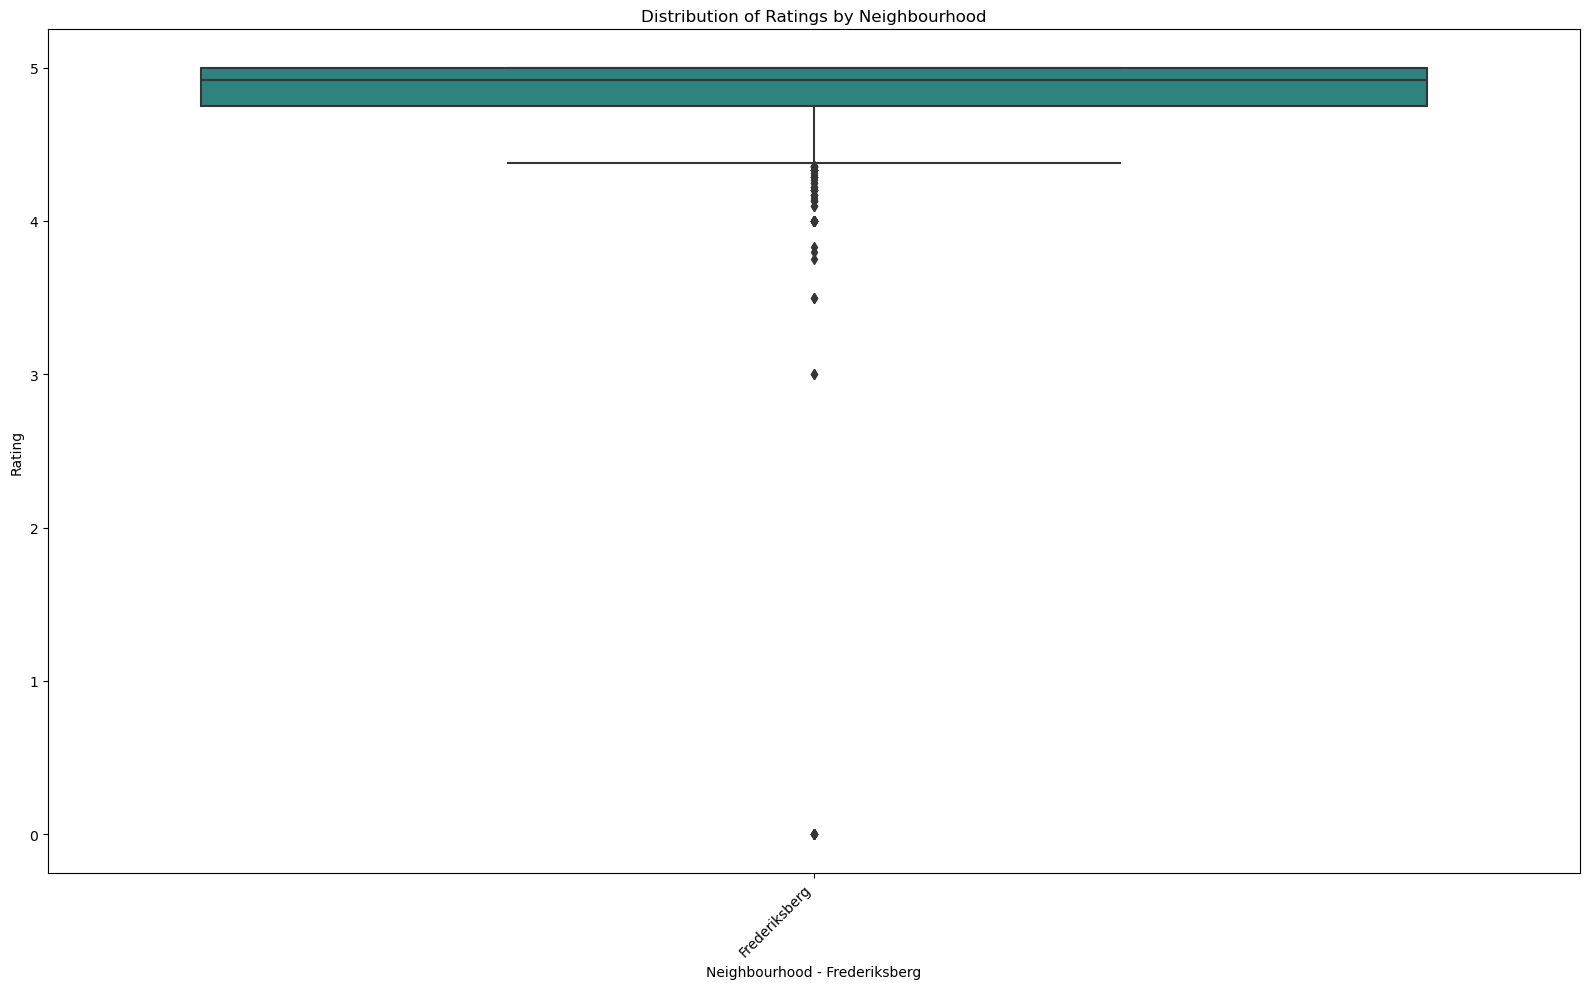

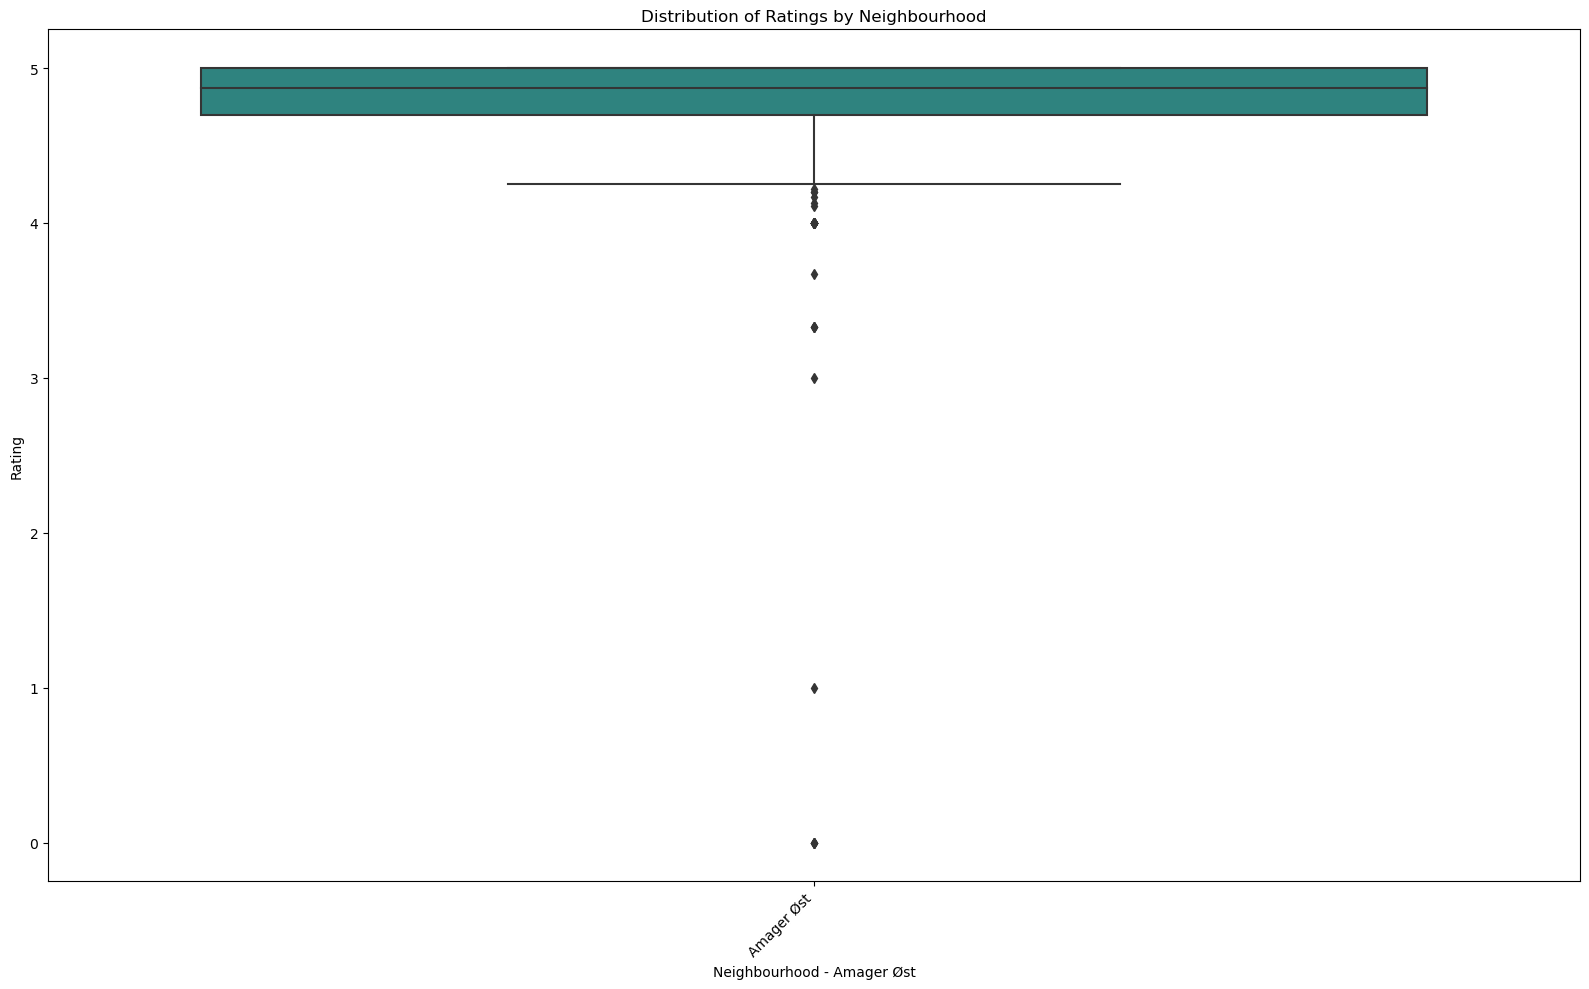

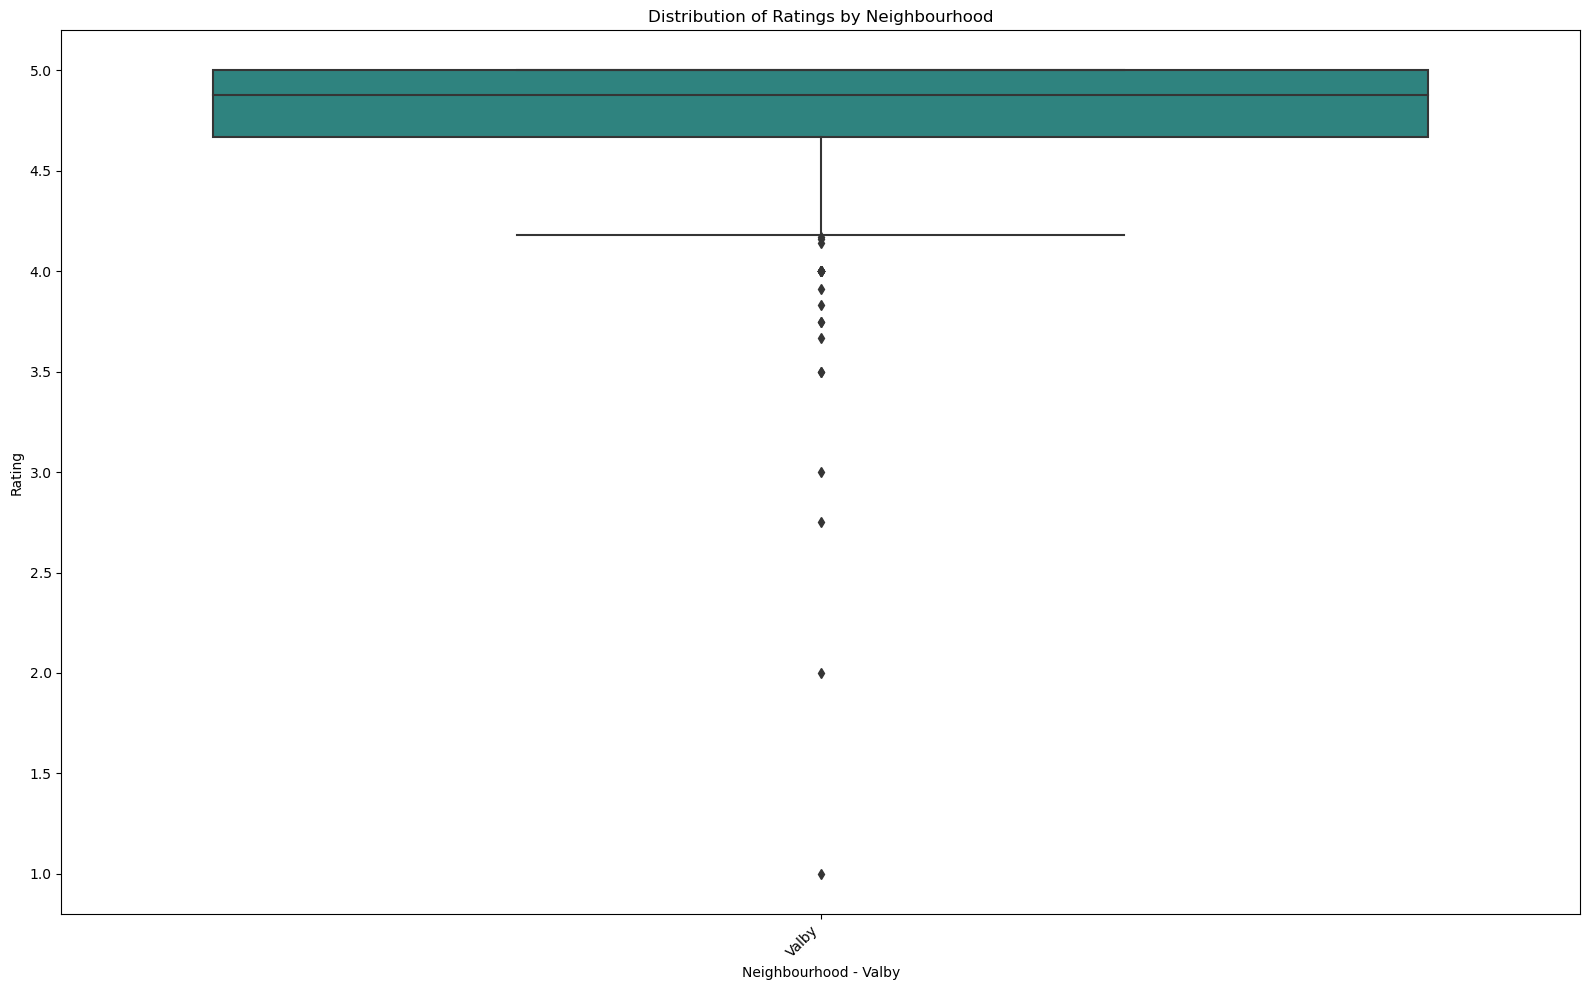

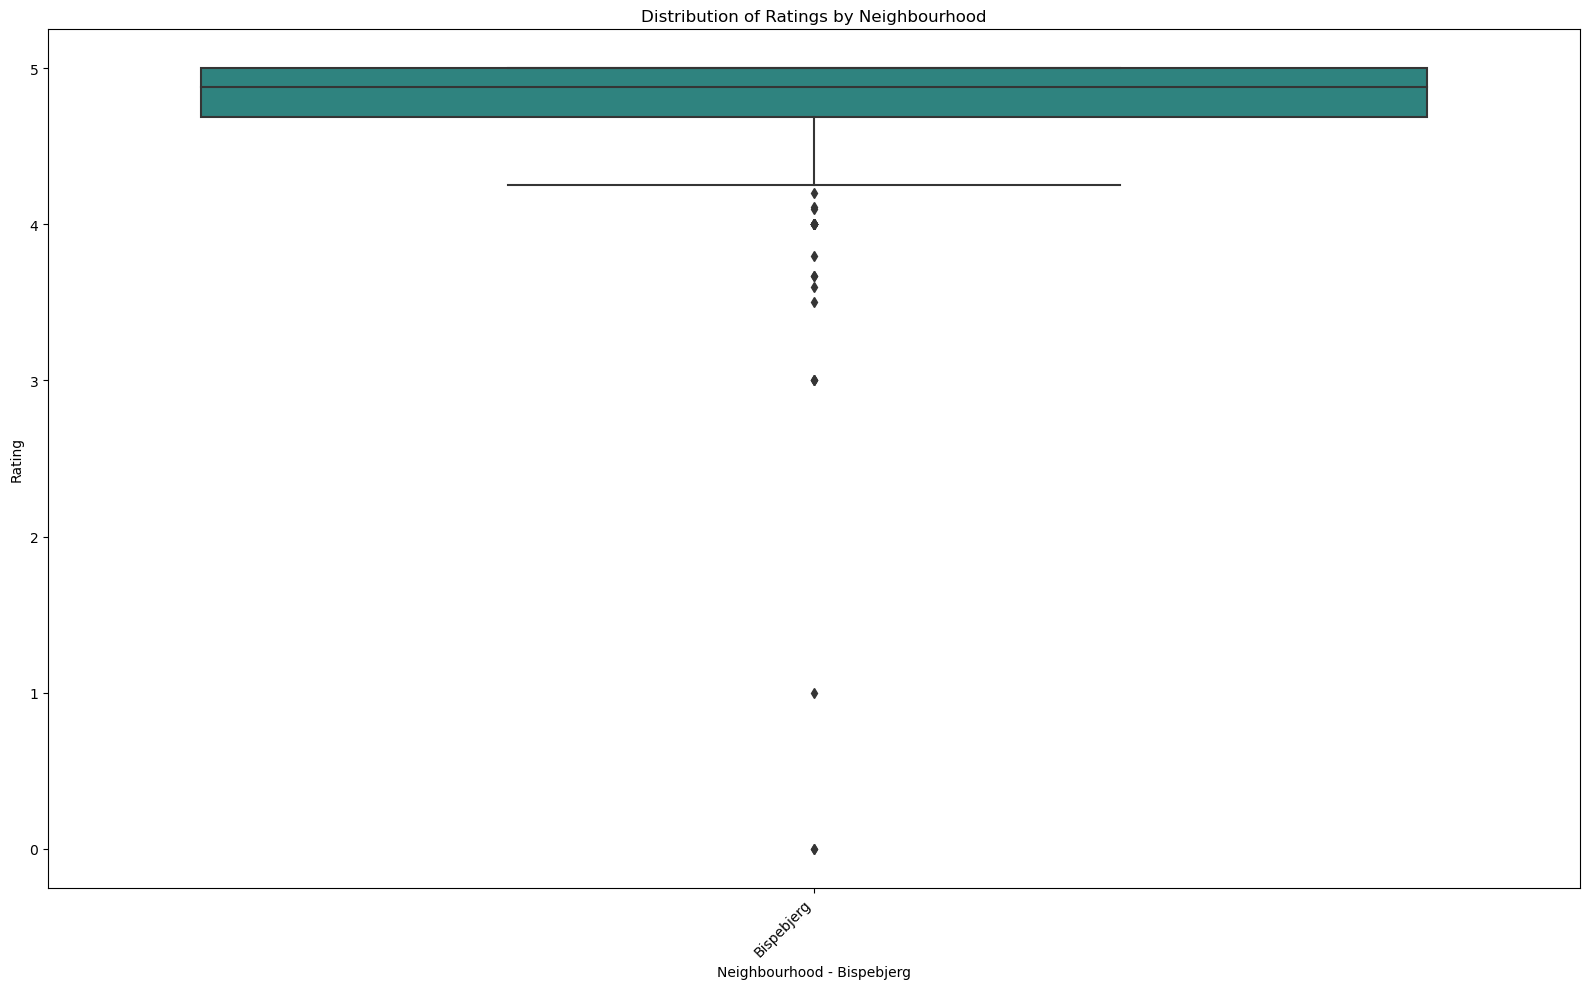

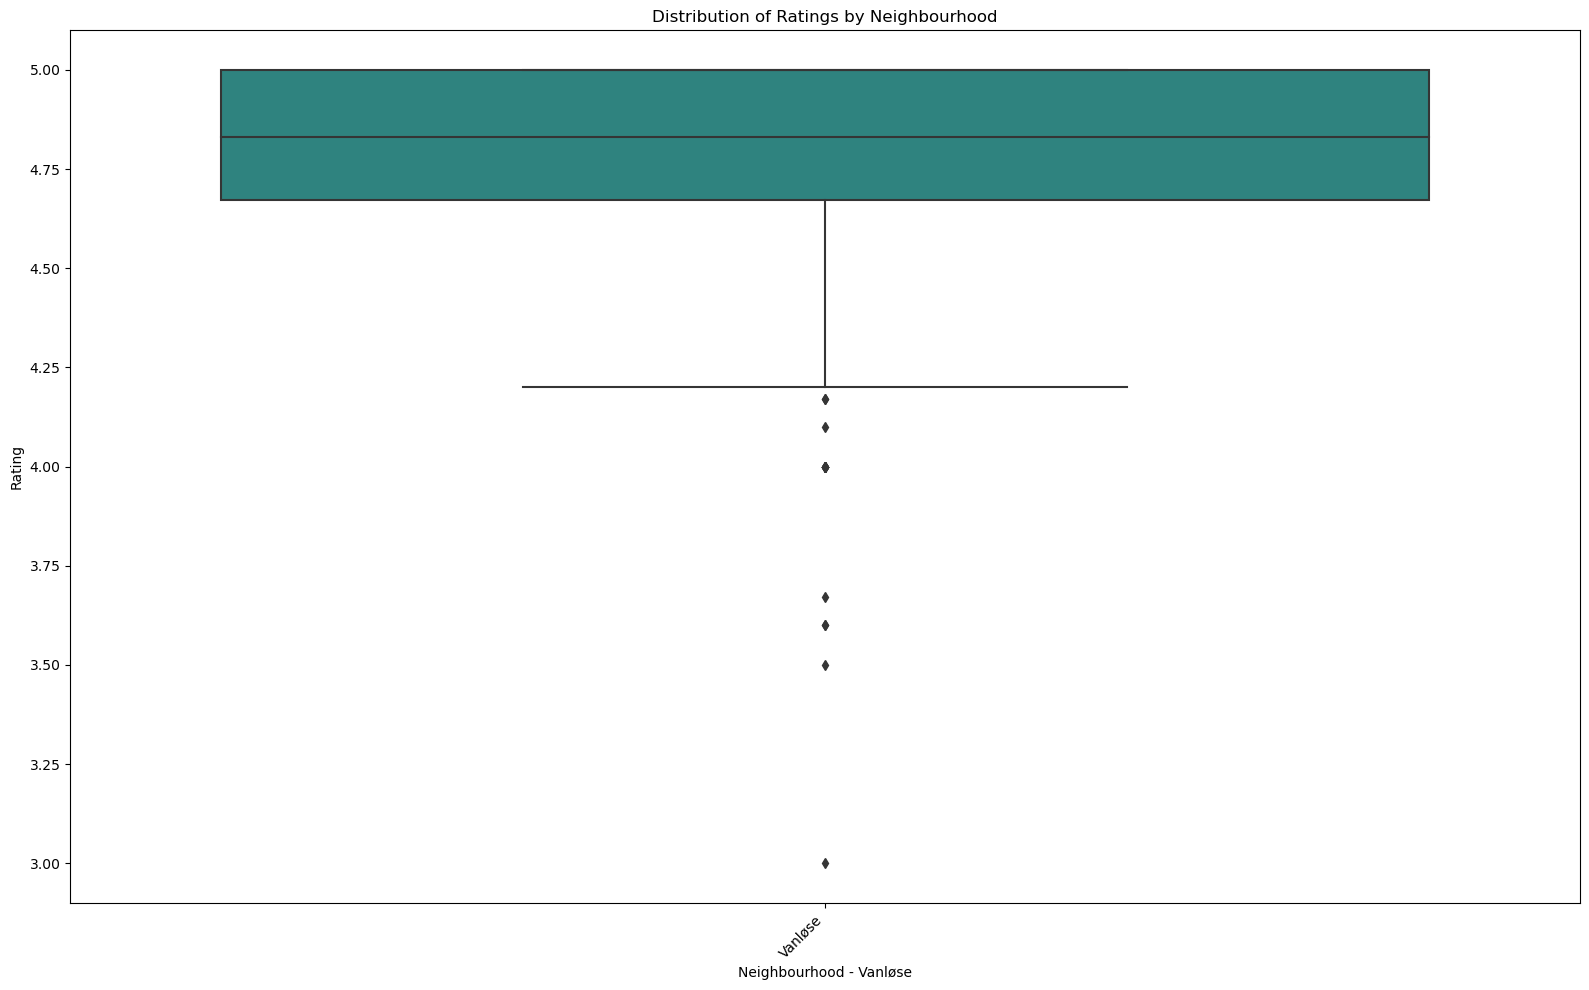

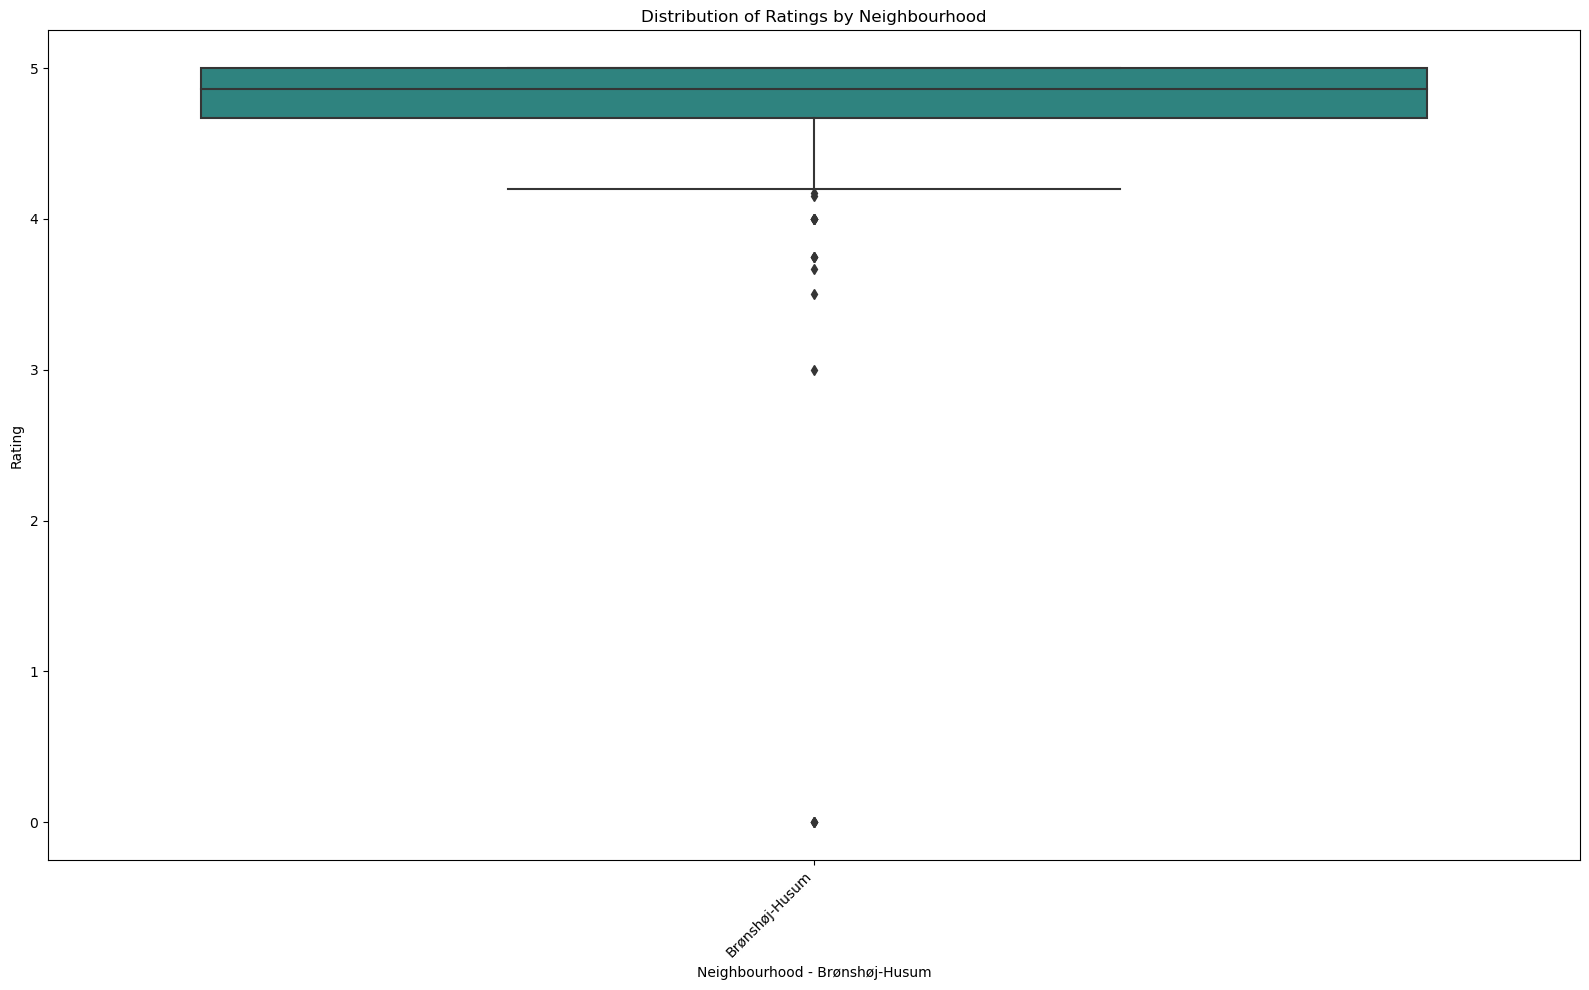

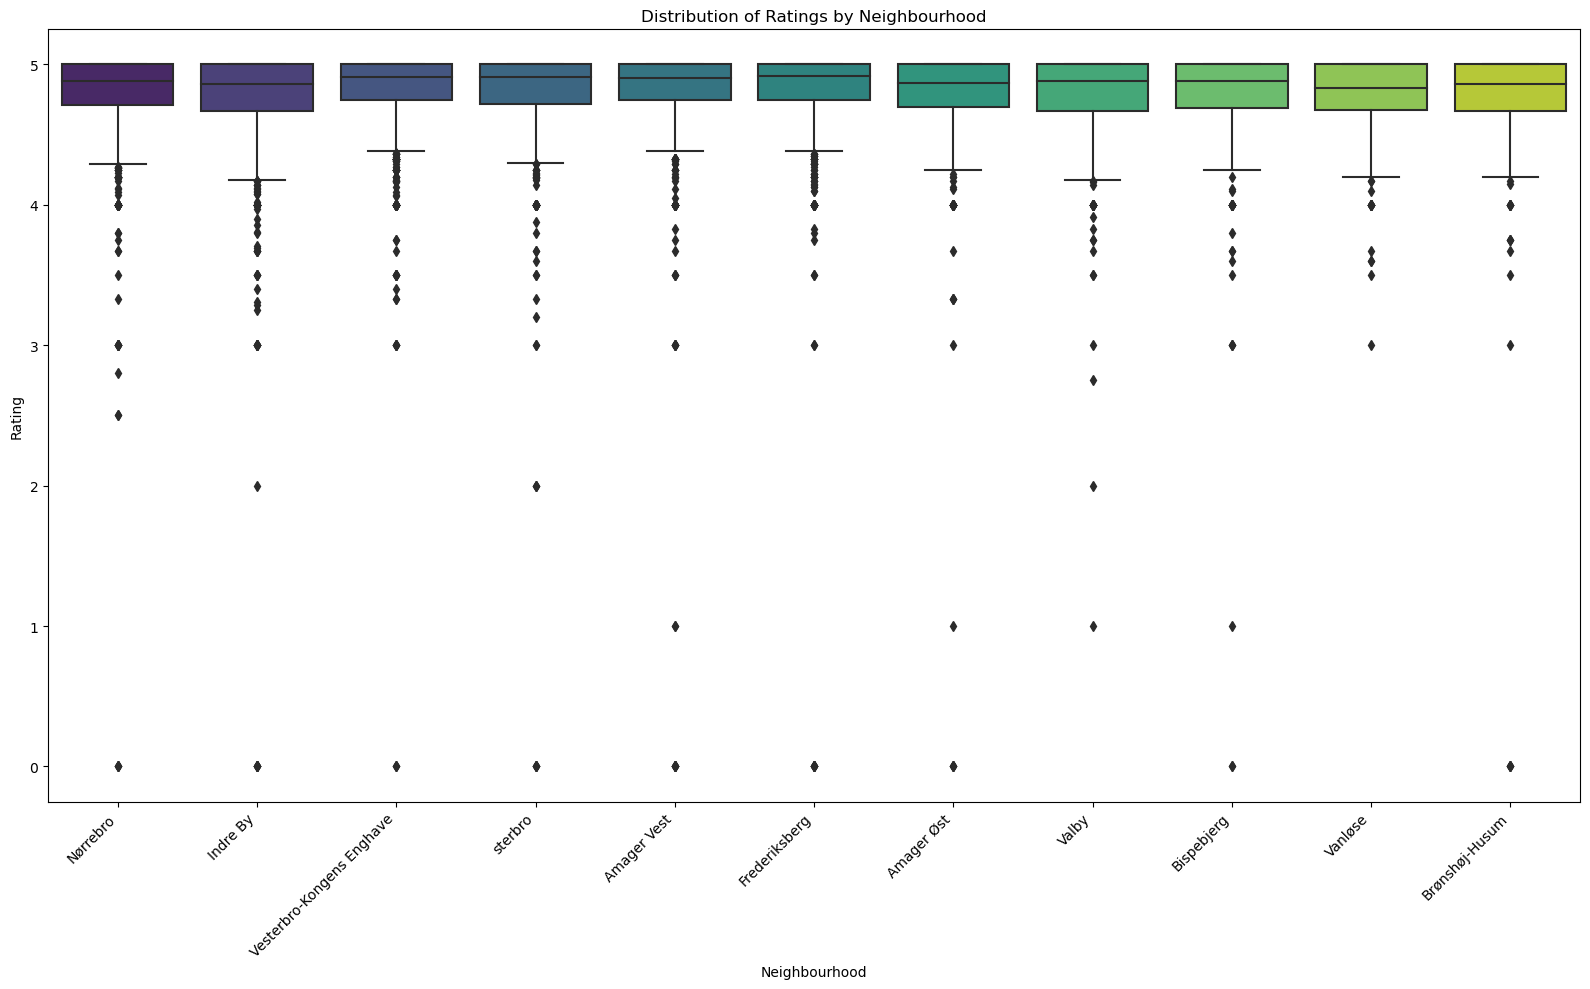

In [18]:
for neighbourhood in data['neighbourhood_cleansed'].unique():
    plt.figure(figsize=(16, 10))
    sns.boxplot(data=data[data['neighbourhood_cleansed'] == neighbourhood], x='neighbourhood_cleansed', y='review_scores_rating', palette='viridis')
    plt.title("Distribution of Ratings by Neighbourhood")
    plt.ylabel("Rating")
    plt.xlabel(f"Neighbourhood - {neighbourhood}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



plt.figure(figsize=(16, 10))
sns.boxplot(data=data, x='neighbourhood_cleansed', y='review_scores_rating', palette='viridis')
plt.title("Distribution of Ratings by Neighbourhood")
plt.ylabel("Rating")
plt.xlabel("Neighbourhood")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 9 - Hosts with top ten most listings

In [19]:
top_hosts = data.groupby('host_id').size().reset_index(name='number_of_listings')
top_ten_hosts= top_hosts.sort_values(by='number_of_listings', ascending=False).head(10)

In [20]:
# plt.figure(figsize=(12, 7))
# sns.barplot(data=top_hosts, x='host_id', y='number_of_listings', palette='viridis')
# plt.title("Top 10 Hosts with the Most Listings")
# plt.ylabel("Number of Listings")
# plt.xlabel("Host ID")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# 10 - Descriptive analysis of the neighbourhoods

## Descriptive statistics

In [21]:
price_stats = data['price'].describe()
price_stats

count    12170.000000
mean      1156.165982
std       1239.248769
min         79.000000
25%        720.000000
50%        979.000000
75%       1328.000000
max      64900.000000
Name: price, dtype: float64

## Price mode by neighbourhood

In [23]:
price_mode = data.groupby('neighbourhood_cleansed')['price'].apply(lambda x: x.mode().iloc[0]).rename('mode')
price_stats = pd.concat([price_stats, price_mode], axis=1)
price_mode

neighbourhood_cleansed
Amager Vest                  1000.0
Amager Øst                   1000.0
Bispebjerg                    700.0
Brønshøj-Husum                500.0
Frederiksberg                1000.0
Indre By                     1200.0
Nørrebro                     1000.0
Valby                         700.0
Vanløse                      1200.0
Vesterbro-Kongens Enghave    1000.0
sterbro                      1000.0
Name: mode, dtype: float64

## Room types

In [25]:
room_type_counts = data.groupby(['neighbourhood_cleansed', 'room_type']).size().unstack().fillna(0)
room_type_counts


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,
Amager Vest,915.0,0.0,149.0,2.0
Amager Øst,793.0,3.0,131.0,1.0
Bispebjerg,510.0,0.0,96.0,1.0
Brønshøj-Husum,217.0,0.0,70.0,2.0
Frederiksberg,1050.0,0.0,133.0,0.0
Indre By,1707.0,10.0,130.0,4.0
Nørrebro,1892.0,0.0,166.0,3.0
Valby,450.0,0.0,89.0,0.0
Vanløse,254.0,0.0,44.0,0.0


In [27]:
data[data['neighbourhood_cleansed'] == 'Vesterbro-Kongens Enghave']['price'].describe()

count     2037.000000
mean      1114.140893
std        692.293635
min        186.000000
25%        760.000000
50%        999.000000
75%       1299.000000
max      10800.000000
Name: price, dtype: float64

In [28]:
data[data['neighbourhood_cleansed'] == 'Brønshøj-Husum']['price'].describe()


count     289.000000
mean      869.422145
std       550.705729
min       145.000000
25%       498.000000
50%       750.000000
75%      1100.000000
max      4462.000000
Name: price, dtype: float64

# 11 - Top 10 highest rated listings visualized
